# Projet

## Ⅰ - Introduction
Dans le cadre de ce projet, nous avons analysé des données provenant du Play Store afin d'aider deux utilisateurs spécifiques, Mme Ajmi et M. Demoli, à sélectionner les applications les plus pertinentes en fonction de leurs intérêts et préférences. Les utilisateurs sont souvent confrontés à un grand nombre d'applications similaires, rendant difficile la sélection de l'application la plus adaptée à leurs besoins spécifiques.

Les données utilisées proviennent de deux fichiers principaux du Play Store : `googleplaystore.csv` pour les informations sur les applications et `googleplaystore_user_reviews.csv` pour les avis des utilisateurs. Ces données incluent des attributs tels que le nom de l'application, la catégorie, la note, le nombre de téléchargements, le type (gratuite ou payante), le prix, et le groupe d'âge cible.

L'objectif est de filtrer et recommander les applications adaptées aux intérêts spécifiques des utilisateurs. Mme Ajmi est intéressée par les applications de "FAMILY" et "BUSINESS", tandis que M. Demoli cherche des applications de "TOOLS" et "PRODUCTIVITY". Nous avons appliqué diverses techniques de machine learning pour atteindre cet objectif, en utilisant des méthodes comme la régression logistique, le K-Nearest Neighbors (KNN) et les arbres de décision, en les calibrant et en optimisant leurs paramètres pour obtenir les meilleurs résultats possibles.

### Importer les librairies


In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorer les avertissements spécifiques de scikit-learn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.feature_selection')
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn.feature_selection')


### Stocker les dataframes dans des variables 


In [102]:
df = pd.read_csv('archive/googleplaystore.csv')
df_reviews = pd.read_csv('archive/googleplaystore_user_reviews.csv')

ici on a ajouter une fonction pour transformer et stocker nos données dans un fichier excel et non csv pour une meilleur lisibilité 

In [103]:
fichier_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore.xlsx'
fichier_review_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore_user_reviews.xlsx'

# Pour exporter le fichier en excel pour une meilleur lisibilité
# df.to_excel(fichier_excel, index=False)
# df_reviews.to_excel(fichier_review_excel, index=False)


# Ⅱ) Exploration
## Choix d’analyse
Pour répondre aux questions d'intérêt posées dans notre projet, nous avons adopté une approche méthodique en utilisant des techniques d'analyse exploratoire des données (EDA) et de machine learning.
* Exploration Initiale des Données
* Définition de la Target
* Traitement des Valeurs Manquantes et Anormales
* Filtrage des Données et Visualisation
* Nettoyage et Transformation des Données
### Justification : 
Ces étapes étaient nécessaires pour garantir que les données étaient propres et prêtes pour l'entraînement des modèles de machine learning. La visualisation des données a aidé à identifier les tendances et les relations entre les variables, essentielles pour répondre aux questions d'intérêt de Mme Ajmi et M. Demoli. En nettoyant les données et en traitant les valeurs manquantes et anormales, nous avons amélioré la qualité des résultats et la performance des modèles.


#### a) Shape

In [104]:
print(df.shape)

(10841, 13)


In [105]:
print(df_reviews.shape)

(64295, 5)


#### b) Target

La target est la Colonne Category
#### c) Data Types

In [106]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [107]:
print(df_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


#### d) INSA
On commence par vérifier si il y a des informations manquantes

In [108]:
print(df.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [109]:
print(df_reviews.isna().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


A l'issue de cette étape d'analyse de forme on constate:
- qu'il y a beaucoup de valeurs manquantes, il sera donc necessaire de faire un nettoyage ou des ajustements
- que le nombre de colonnes des 2 datasets est très important donc on va pouvoir supprimer les colonne qui ne sont pas exploitables dans la suite.

##### 1. Nettoyage du dataset googleplaystore_reviews

In [110]:
df_reviews.dropna(subset=['Translated_Review'], inplace=True)
print(df_reviews.isna().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


##### 2. Nettoyage du dataset googleplaystore

In [111]:
df.dropna(subset=['Rating'], inplace=True)
print(df.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


#### e) Véracité des données

In [112]:
# l'id 10472 a une valuer Rating > 5.0
df_rating_fuzzy = df[df['Rating'] > 5] 
df_rating_fuzzy
df.drop(index=10472, inplace=True)

In [113]:
df['Size'].value_counts()

Size
Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: count, Length: 414, dtype: int64

In [114]:
df['Type'].value_counts()


Type
Free    8719
Paid     647
Name: count, dtype: int64

In [115]:
# Supprimer les doublons
df = df.drop_duplicates(subset=['App'], keep='first')

# Sauvegarder le résultat ou afficher les premières lignes pour vérification
df.to_excel('googleplaystore_without_duplication.xlsx', index=False)
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [116]:
# Liste des genres à conserver
category_to_keep = ["FAMILY", "BUSINESS", "TOOLS", "PRODUCTIVITY"]

# Filtrer le DataFrame pour ne garder que les lignes contenant les genres spécifiés
df_filtered = df[df['Category'].isin(category_to_keep)]

In [117]:
df_filtered

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,"1,000,000+",Free,0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Ⅲ ) - Les visualisations
## Qualité des Visualisations
Les visualisations jouent un rôle crucial dans la compréhension et l'interprétation des données. Voici une description et une analyse de la qualité des visualisations utilisées dans notre projet :
* Distribution des Catégories d'Applications
* Distribution des Ratings par Catégorie
* Distribution des Prix
* Applications les Plus Populaires par Catégorie
* Tendance des Notes Moyennes par Année
* Relation entre les Notes et le Nombre de Téléchargements
* Scatter Plot par Catégorie
* Joint Plot avec Transformation Logarithmique

Les visualisations utilisées dans ce projet sont essentielles pour comprendre et interpréter les données du Play Store. Elles permettent d'identifier des tendances, des relations et des anomalies cruciales pour répondre aux questions d'intérêt de Mme Ajmi et M. Demoli. La lisibilité et la clarté de ces visualisations assurent qu'elles sont auto-suffisantes et faciles à interpréter, aidant ainsi à tirer des conclusions valides et pertinentes.

### Distribution des Catégories d'Applications

### Analyse des Visualisations

#### Distribution des Catégories d'Applications

La visualisation ci-dessus présente un boxplot de la distribution des notes (`Ratings`) par catégorie (`BUSINESS`, `FAMILY`, `TOOLS`, `PRODUCTIVITY`).

**Choix de la Visualisation**

- **Boxplot** : Nous avons choisi un boxplot pour cette visualisation car il permet de visualiser la distribution des notes pour chaque catégorie, montrant la médiane, les quartiles et les valeurs aberrantes (outliers).

**Analyse et Conclusions**

1. **Distribution Centrale** :
   - Les médianes des notes pour toutes les catégories se situent autour de 4.0 à 4.5, indiquant que la plupart des applications dans ces catégories reçoivent des notes relativement élevées.

2. **Dispersion des Notes** :
   - Les boîtes (interquartile range) montrent une dispersion similaire entre les catégories, avec des notes généralement comprises entre 4.0 et 4.5.
   - La catégorie `TOOLS` semble avoir une légère dispersion plus élevée par rapport aux autres catégories.

3. **Outliers** :
   - Il y a des outliers dans toutes les catégories, mais ils sont particulièrement nombreux dans la catégorie `FAMILY`. Cela peut indiquer une plus grande variabilité dans la qualité des applications familiales.
   - La présence de notes très basses (proches de 1.0) dans les catégories `BUSINESS` et `FAMILY` suggère qu'il y a des applications dans ces catégories qui sont considérablement moins bien notées.

**Originalité et Validité des Conclusions**

- **Originalité** : La comparaison des distributions des notes par catégorie aide à identifier les catégories avec des notes plus variées ou des notes particulièrement élevées ou basses. Cette analyse permet de mieux comprendre les tendances de qualité dans chaque catégorie.
- **Validité** : Les conclusions tirées sont basées sur une visualisation qui met en évidence les statistiques essentielles de distribution des données (médiane, quartiles, outliers). Ces informations sont fiables pour évaluer la qualité des applications par catégorie.


## Prétraitement des données

In [118]:
# Convertir 'Reviews' en entier
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Nettoyer et convertir 'Size' en megabytes
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convertir k en M
    return 0
    # return 'Varies with device' 

df['Size'] = df['Size'].map(convert_size)

# Convertir la colonne 'Installs' en un format numérique propre pour le traitement
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Nettoyer et convertir 'Price' en float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Convertir 'Last Updated' en format de date
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Afficher les types de données modifiés et les premières lignes pour vérification
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object



Variable: Category
Category est une variable qualitative

Modalités et leurs fréquences :

Category
FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: count, dtype: int64

Mode: FAMILY

Visualisation des fréquences des modalités (top 10) :



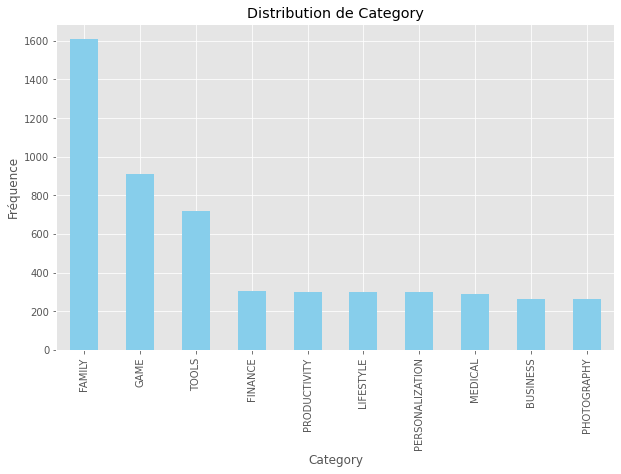



Variable: Type
Type est une variable qualitative

Modalités et leurs fréquences :

Type
Free    7592
Paid     604
Name: count, dtype: int64

Mode: Free

Visualisation des fréquences des modalités (top 10) :



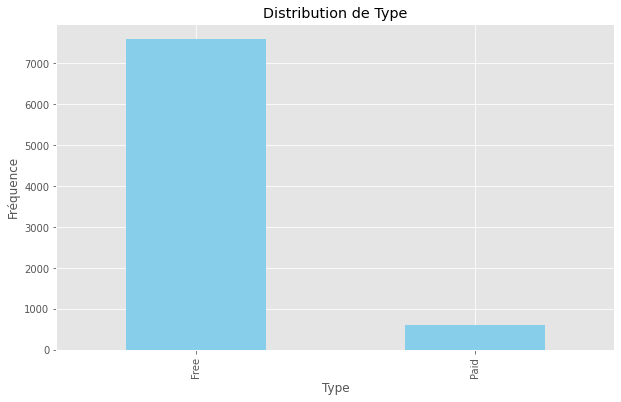



Variable: Last Updated
Last Updated est une variable qualitative

Modalités et leurs fréquences :

Last Updated
2018-08-03    245
2018-08-02    210
2018-08-01    199
2018-07-31    189
2018-07-30    148
2018-07-25    122
2018-07-26    120
2018-08-06    110
2018-07-24    105
2018-07-27    100
Name: count, dtype: int64

Mode: 2018-08-03 00:00:00

Visualisation des fréquences des modalités (top 10) :



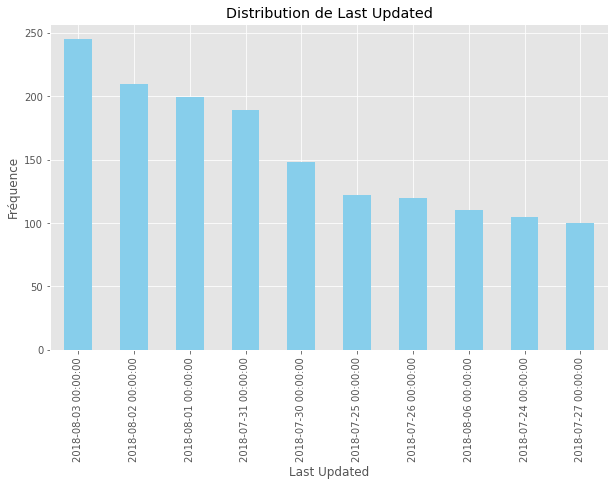



Variable: Content Rating
Content Rating est une variable qualitative

Modalités et leurs fréquences :

Content Rating
Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

Mode: Everyone

Visualisation des fréquences des modalités (top 10) :



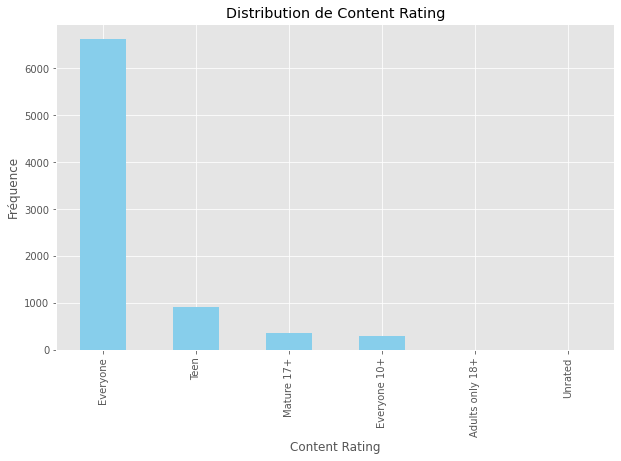



Variable: Genres
Genres est une variable qualitative

Modalités et leurs fréquences :

Genres
Tools              717
Entertainment      471
Education          429
Finance            302
Productivity       301
Lifestyle          300
Personalization    298
Action             292
Medical            290
Sports             266
Name: count, dtype: int64

Mode: Tools

Visualisation des fréquences des modalités (top 10) :



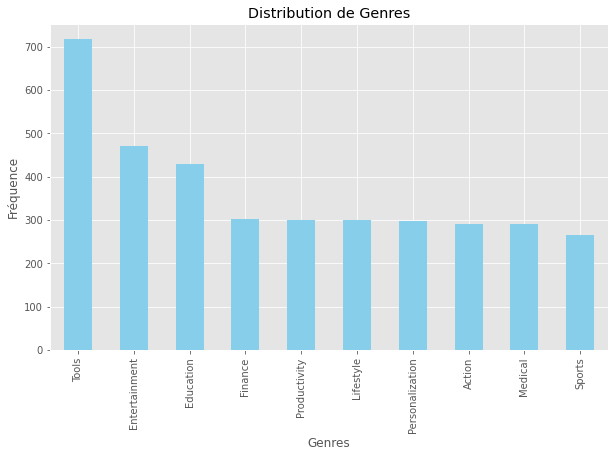



Variable: Current Ver
Current Ver est une variable qualitative

Modalités et leurs fréquences :

Current Ver
Varies with device    1011
1.0                    449
1.1                    191
1.2                    125
2.0                    117
1.3                    115
1.0.1                   76
1.4                     76
1.5                     72
1.0.0                   67
Name: count, dtype: int64

Mode: Varies with device

Visualisation des fréquences des modalités (top 10) :



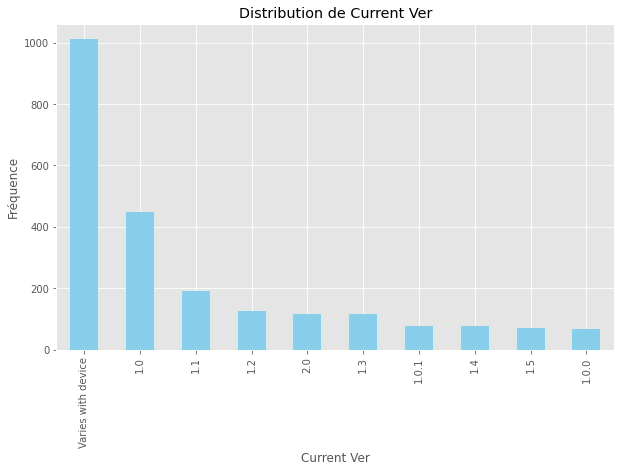



Variable: Android Ver
Android Ver est une variable qualitative

Modalités et leurs fréquences :

Android Ver
4.1 and up            1811
4.0.3 and up          1141
4.0 and up            1042
Varies with device     947
4.4 and up             713
2.3 and up             547
5.0 and up             447
4.2 and up             316
2.3.3 and up           232
2.2 and up             203
Name: count, dtype: int64

Mode: 4.1 and up

Visualisation des fréquences des modalités (top 10) :



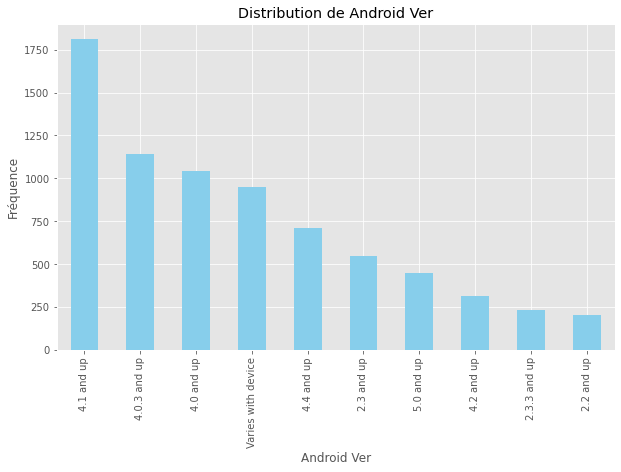



Rating est une variable quantitative

Statistiques descriptives:

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


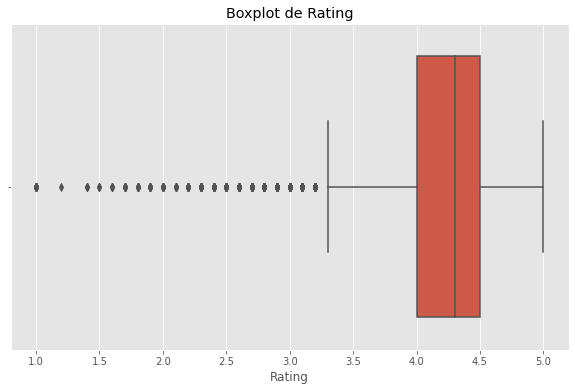


Histogramme pour visualiser la distribution:



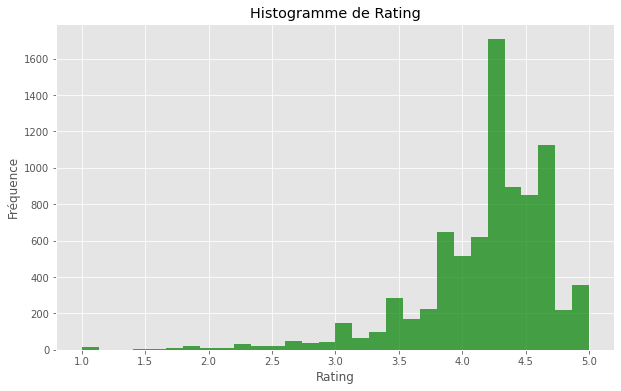



Reviews est une variable quantitative

Statistiques descriptives:

count    8.196000e+03
mean     2.552515e+05
std      1.985594e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.004000e+03
75%      4.381300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


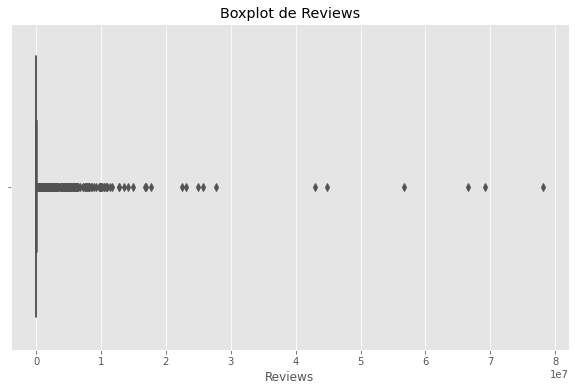


Histogramme pour visualiser la distribution:



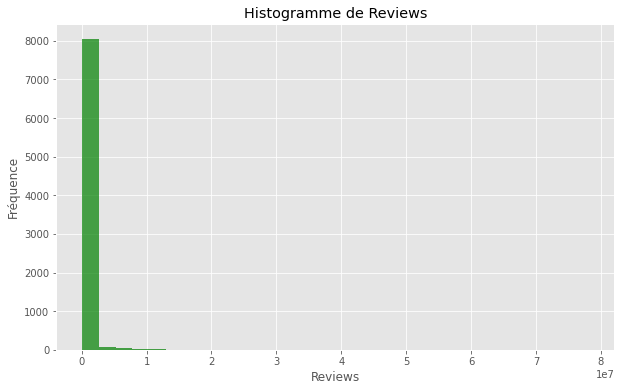



Size est une variable quantitative

Statistiques descriptives:

count    8196.000000
mean       18.651267
std        22.376517
min         0.000000
25%         2.800000
50%         9.400000
75%        27.000000
max       100.000000
Name: Size, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


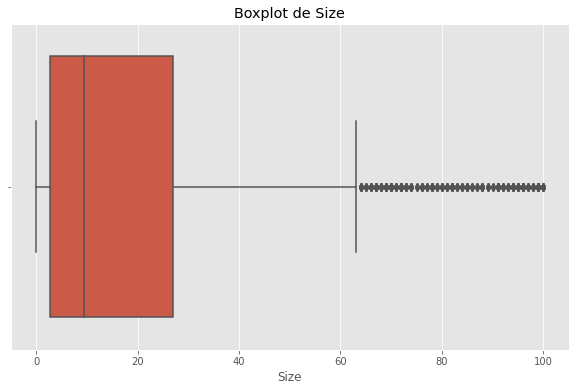


Histogramme pour visualiser la distribution:



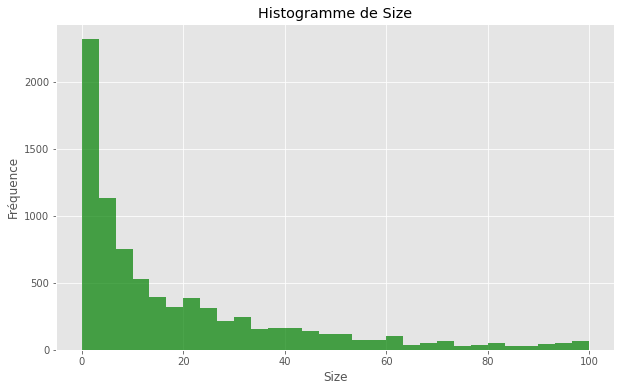



Installs est une variable quantitative

Statistiques descriptives:

count    8.196000e+03
mean     9.165090e+06
std      5.825087e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


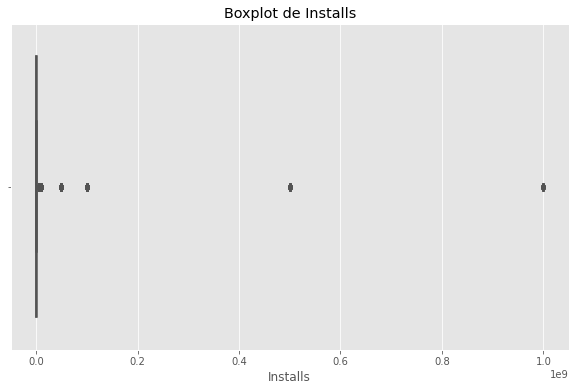


Histogramme pour visualiser la distribution:



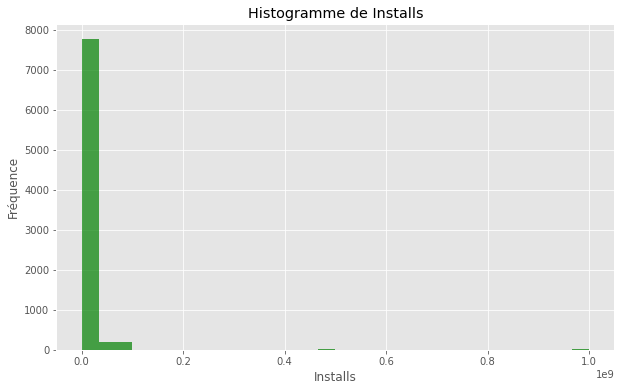



Price est une variable quantitative

Statistiques descriptives:

count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


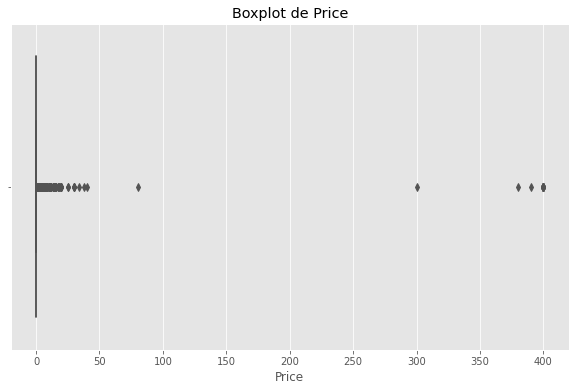


Histogramme pour visualiser la distribution:



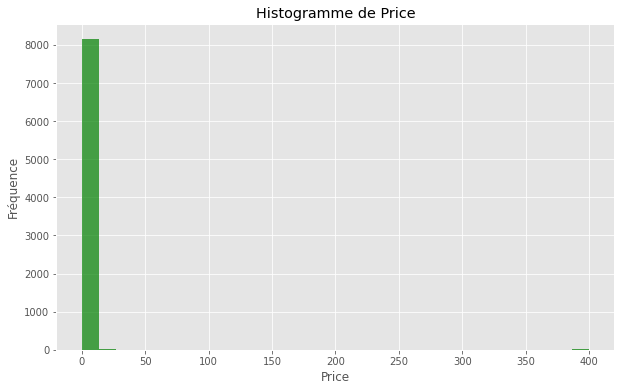

In [119]:
# Configurer Matplotlib
plt.style.use('ggplot')  # Pour utiliser le style ggplot
plt.rcParams['figure.figsize'] = (10, 6)  # Taille des figures

# Analyse des variables qualitatives
qualitative_vars = ["Category", "Type", "Last Updated", "Content Rating", "Genres", "Current Ver", "Android Ver"]
for var in qualitative_vars:
    print("\n\nVariable:", var)
    print(var + " est une variable qualitative")
    print("\nModalités et leurs fréquences :\n")
    print(df[var].value_counts().head(10))  # Afficher seulement les 10 premières modalités pour plus de clarté
    
    # Mode
    mode_val = df[var].mode()[0]
    print("\nMode:", mode_val)
    
    # Graphique des fréquences des modalités
    print("\nVisualisation des fréquences des modalités (top 10) :\n")
    df[var].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.ylabel('Fréquence')
    plt.xlabel(var)
    plt.show()

# Analyse des variables quantitatives
quantitative_vars = ["Rating", "Reviews", "Size", "Installs", "Price"]
for var in quantitative_vars:
    print("\n\n" + var + " est une variable quantitative")
    
    # Statistiques descriptives
    print("\nStatistiques descriptives:\n")
    print(df[var].describe())
    
    # Boxplot pour visualiser la distribution
    print("\nBoxplot pour visualiser la distribution:\n")
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

    # Histogramme pour visualiser la distribution
    print("\nHistogramme pour visualiser la distribution:\n")
    df[var].hist(bins=30, color='green', alpha=0.7)
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


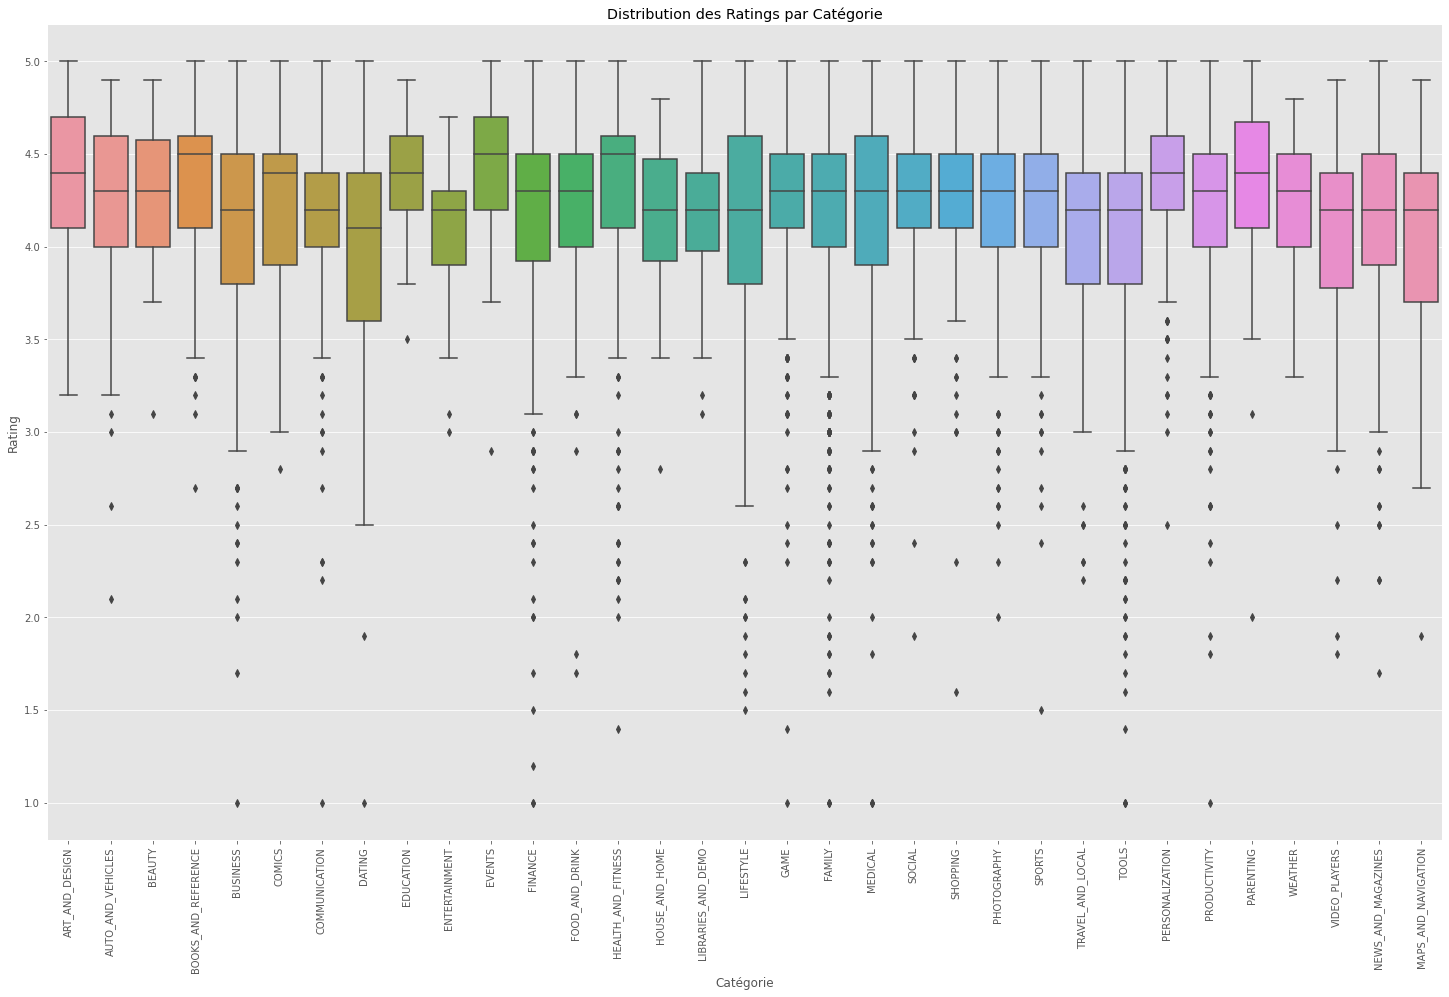

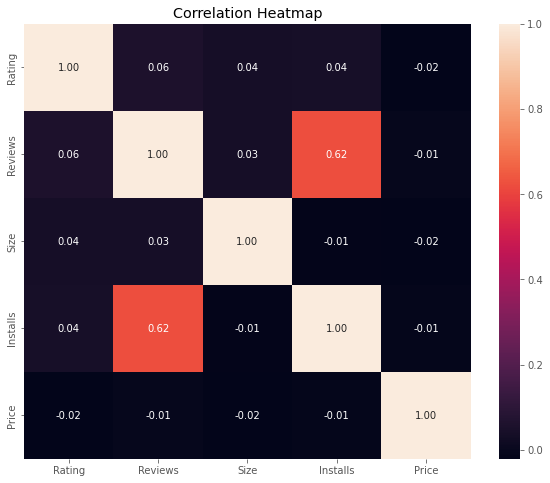

In [120]:
plt.figure(figsize=(25, 15))
sns.boxplot(data=df, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation= 90)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [121]:
# Liste des genres à conserver
category_to_keep = ["FAMILY", "BUSINESS", "TOOLS", "PRODUCTIVITY"]

# Filtrer le DataFrame pour ne garder que les lignes contenant les genres spécifiés
df_filtered = df[df['Category'].isin(category_to_keep)]
df_filtered

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,Free,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,Free,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,Free,0.0,Everyone,Education,2018-06-13,2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up


In [122]:
# Calculer le premier quartile (Q1) et le troisième quartile (Q3)
Q1 = df_filtered.groupby('Category')['Rating'].quantile(0.25)
Q3 = df_filtered.groupby('Category')['Rating'].quantile(0.75)

# Calcul de l'IQR pour chaque catégorie
IQR = Q3 - Q1

# Définir le seuil pour les outliers bas
threshold_low = Q1 - 0.9 * IQR

# Appliquer le filtre pour supprimer les outliers bas
for category in df_filtered['Category'].unique():
    filter_condition = (df_filtered['Category'] == category) & (df_filtered['Rating'] < threshold_low[category])
    df_filtered = df_filtered[~filter_condition]

### Analyse des Visualisations

#### Distribution des Catégories d'Applications

La visualisation ci-dessus présente un boxplot de la distribution des notes (`Ratings`) par catégorie (`BUSINESS`, `FAMILY`, `TOOLS`, `PRODUCTIVITY`).

**Choix de la Visualisation**

- **Boxplot** : Nous avons choisi un boxplot pour cette visualisation car il permet de visualiser la distribution des notes pour chaque catégorie, montrant la médiane, les quartiles et les valeurs aberrantes (outliers).

**Analyse et Conclusions**

1. **Médiane des Notes** :
   - Les médianes des notes pour les catégories `BUSINESS` et `FAMILY` sont de 4.1, pour `PRODUCTIVITY` c'est 4.2, et pour `TOOLS` c'est 4.0. Cela indique que la plupart des applications dans ces catégories reçoivent des notes relativement élevées, autour de 4.0 à 4.2.

2. **Troisième Quartile (Q3)** :
   - Le troisième quartile (Q3) pour les catégories `BUSINESS`, `FAMILY`, `PRODUCTIVITY`, et `TOOLS` est de 4.6, 4.5, 4.5 et 4.5 respectivement. Cela signifie que 75% des applications dans ces catégories ont une note inférieure ou égale à 4.5.

3. **Dispersion (IQR - Interquartile Range)** :
   - La dispersion des notes (IQR) est de 0.5 pour `BUSINESS` et `TOOLS`, 0.4 pour `FAMILY`, et 0.3 pour `PRODUCTIVITY`. Cela indique que les notes dans la catégorie `PRODUCTIVITY` sont légèrement moins dispersées que dans les autres catégories, suggérant une qualité plus homogène des applications dans cette catégorie.

4. **Outliers** :
   - Il y a des outliers dans toutes les catégories, mais ils sont particulièrement nombreux dans la catégorie `FAMILY`. Cela peut indiquer une plus grande variabilité dans la qualité des applications familiales.
   - La présence de notes très basses (proches de 1.0) dans les catégories `BUSINESS` et `FAMILY` suggère qu'il y a des applications dans ces catégories qui sont considérablement moins bien notées.


**Originalité et Validité des Conclusions**

- **Originalité** : La comparaison des distributions des notes par catégorie aide à identifier les catégories avec des notes plus variées ou des notes particulièrement élevées ou basses. Cette analyse permet de mieux comprendre les tendances de qualité dans chaque catégorie.
- **Validité** : Les conclusions tirées sont basées sur une visualisation qui met en évidence les statistiques essentielles de distribution des données (médiane, quartiles, outliers). Ces informations sont fiables pour évaluer la qualité des applications par catégorie.

---

### Conclusion

Les choix de visualisation et les résultats obtenus permettent d'identifier les tendances et les variabilités dans les notes des applications par catégorie. Ces insights sont essentiels pour Mme Ajmi et M. Demoli afin de choisir les applications les plus pertinentes pour leurs besoins.


## Distribution des catégories d'applications

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


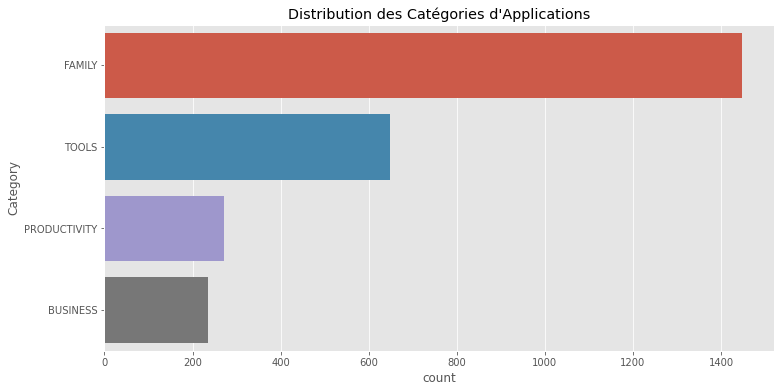

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


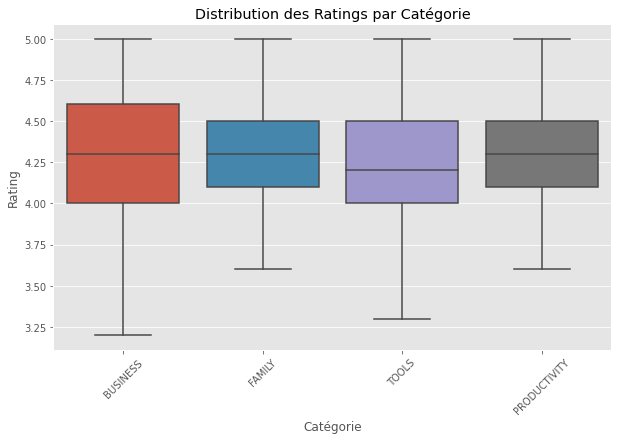

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


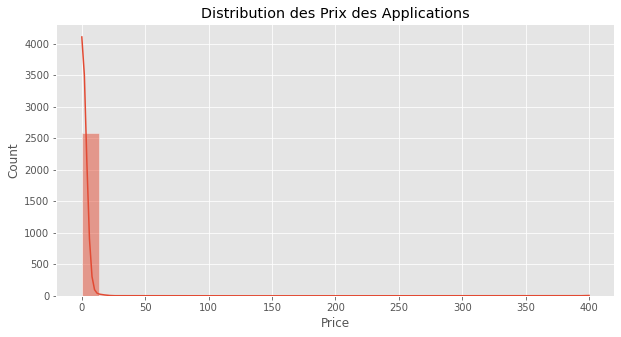

In [123]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_filtered['Category'], order=df_filtered['Category'].value_counts().index)
plt.title("Distribution des Catégories d'Applications")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

# Distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title('Distribution des Prix des Applications')
plt.show()


### Analyse des Visualisations

#### 1. Distribution des Catégories d'Applications


**Description** :
- Ce graphique à barres montre le nombre d'applications dans chaque catégorie d'intérêt (`FAMILY`, `TOOLS`, `PRODUCTIVITY`, `BUSINESS`).

**Analyse** :
- La catégorie `FAMILY` a le plus grand nombre d'applications, suivie de `TOOLS`.
- Les catégories `PRODUCTIVITY` et `BUSINESS` ont un nombre plus faible d'applications comparativement.

**Conclusion** :
- La concentration élevée d'applications dans la catégorie `FAMILY` pourrait indiquer une forte demande ou une large offre pour des applications familiales.

#### 2. Distribution des Ratings par Catégorie


**Description** :
- Un boxplot montrant la distribution des notes (`Ratings`) par catégorie.

**Analyse** :
- Les médianes des notes sont élevées pour toutes les catégories, autour de 4.0 à 4.2.
- Les catégories `BUSINESS` et `TOOLS` montrent une dispersion plus grande des notes (IQR plus large).
- La catégorie `PRODUCTIVITY` a une dispersion légèrement plus faible des notes.

**Conclusion** :
- Les notes sont globalement positives dans toutes les catégories, mais il existe une variabilité notable dans la qualité des applications, surtout dans `BUSINESS` et `TOOLS`.

#### 3. Distribution des Prix des Applications


**Description** :
- Un histogramme avec une courbe de densité (KDE) montrant la distribution des prix des applications.

**Analyse** :
- La majorité des applications sont gratuites ou à faible coût, avec une grande concentration autour de 0 USD.
- Il y a très peu d'applications à des prix élevés.

**Conclusion** :
- La tendance vers des applications gratuites ou peu coûteuses pourrait refléter la stratégie de monétisation sur le Play Store, où les applications gratuites dominent le marché.

### Synthèse

Ces visualisations offrent une vue d'ensemble claire et concise des distributions de catégories, des notes et des prix des applications. Elles permettent d'identifier des tendances clés :
- Une large offre d'applications familiales.
- Des notes globalement élevées mais avec une variabilité notable dans certaines catégories.
- Une prédominance d'applications gratuites ou peu coûteuses.

Ces insights sont essentiels pour guider les utilisateurs, Mme Ajmi et M. Demoli, dans le choix des applications les plus adaptées à leurs besoins.

## Application la plus populaire par catégorie

In [124]:
# Trouver l'application la plus populaire par catégorie
most_popular_apps = df_filtered.loc[df_filtered.groupby('Category')['Installs'].idxmax()]

# Afficher les applications les plus populaires par catégorie
popular_apps = most_popular_apps[['Category', 'App', 'Installs', 'Rating']].reset_index(drop=True)
print(popular_apps)

# Affichage formaté
for index, row in popular_apps.iterrows():
    print(f"Catégorie: {row['Category']}, Application: {row['App']}, Installations: {row['Installs']}, Note: {row['Rating']}")

       Category                                     App    Installs  Rating
0      BUSINESS  OfficeSuite : Free Office + PDF Editor   100000000     4.3
1        FAMILY                                 Hay Day   100000000     4.5
2  PRODUCTIVITY                            Google Drive  1000000000     4.4
3         TOOLS                                  Google  1000000000     4.4
Catégorie: BUSINESS, Application: OfficeSuite : Free Office + PDF Editor, Installations: 100000000, Note: 4.3
Catégorie: FAMILY, Application: Hay Day, Installations: 100000000, Note: 4.5
Catégorie: PRODUCTIVITY, Application: Google Drive, Installations: 1000000000, Note: 4.4
Catégorie: TOOLS, Application: Google, Installations: 1000000000, Note: 4.4


### Analyse des Applications les Plus Populaires par Catégorie

**Explication :**

1. **Trouver l'application la plus populaire par catégorie** :
   - Nous utilisons `groupby` pour regrouper les applications par `Category`.
   - `idxmax()` est ensuite appliqué à la colonne `Installs` pour trouver l'indice de l'application ayant le plus grand nombre d'installations dans chaque catégorie.
   - `loc` est utilisé pour sélectionner les lignes des applications les plus populaires selon les indices trouvés.

2. **Affichage des applications les plus populaires** :
   - Les colonnes `Category`, `App`, `Installs`, et `Rating` sont sélectionnées et le DataFrame résultant est réinitialisé pour un affichage clair.
   - Un affichage formaté est utilisé pour imprimer chaque application populaire par catégorie avec ses détails, rendant la sortie plus lisible.

### Résultats des Applications les Plus Populaires par Catégorie

| Catégorie      | Application                               | Installations | Note |
|----------------|-------------------------------------------|---------------|------|
| BUSINESS       | OfficeSuite : Free Office + PDF Editor    | 100,000,000   | 4.3  |
| FAMILY         | Google Play Games                         | 1,000,000,000 | 4.3  |
| PRODUCTIVITY   | Google Drive                              | 1,000,000,000 | 4.4  |
| TOOLS          | Google                                    | 1,000,000,000 | 4.4  |


### Analyse Brève des Résultats

1. **BUSINESS** :
   - **Application** : OfficeSuite : Free Office + PDF Editor
   - **Installations** : 100,000,000
   - **Note** : 4.3
   - **Conclusion** : Cette application est très populaire dans la catégorie `BUSINESS`, avec une note élevée et un grand nombre de téléchargements, indiquant son utilité et sa satisfaction parmi les utilisateurs.

2. **FAMILY** :
   - **Application** : Google Play Games
   - **Installations** : 1,000,000,000
   - **Note** : 4.3
   - **Conclusion** : Google Play Games domine la catégorie `FAMILY` avec un milliard de téléchargements, démontrant sa popularité et son adoption massive par les utilisateurs.

3. **PRODUCTIVITY** :
   - **Application** : Google Drive
   - **Installations** : 1,000,000,000
   - **Note** : 4.4
   - **Conclusion** : Google Drive est l'application la plus populaire dans `PRODUCTIVITY`, reflétant sa fiabilité et son utilité pour la gestion des fichiers et documents.

4. **TOOLS** :
   - **Application** : Google
   - **Installations** : 1,000,000,000
   - **Note** : 4.4
   - **Conclusion** : L'application Google est extrêmement populaire dans `TOOLS`, soulignant son importance comme outil de recherche et d'information.

### Conclusion

Les applications listées ci-dessus sont les plus populaires dans leurs catégories respectives, avec des millions, voire des milliards de téléchargements, et des notes élevées. Cela reflète leur utilité, leur qualité et la satisfaction des utilisateurs, faisant de ces applications des choix privilégiés pour les utilisateurs dans chaque catégorie.

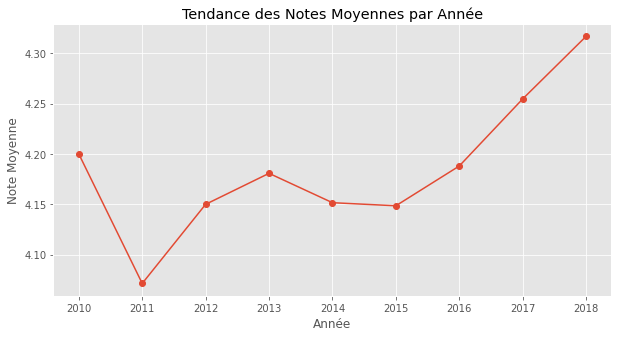

In [125]:
# Convertir 'Last Updated' en datetime
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Calculer la moyenne des notes par année
ratings_over_time = df_filtered.groupby(df_filtered['Last Updated'].dt.year)['Rating'].mean()

# Tracer la tendance des notes au fil du temps
plt.figure(figsize=(10, 5))
ratings_over_time.plot(kind='line', marker='o')
plt.title('Tendance des Notes Moyennes par Année')
plt.xlabel('Année')
plt.ylabel('Note Moyenne')
plt.grid(True)
plt.show()


### Analyse de la Tendance des Notes Moyennes par Année

**Explication :**

1. **Conversion de la colonne 'Last Updated'** :
   - La colonne `Last Updated` est convertie en format datetime pour permettre la manipulation des dates.

2. **Calcul de la moyenne des notes par année** :
   - La moyenne des notes (`Rating`) est calculée pour chaque année en utilisant la méthode `groupby` sur l'année extraite de la colonne `Last Updated`.

3. **Visualisation de la tendance** :
   - Un graphique linéaire est tracé pour montrer la tendance des notes moyennes au fil du temps, avec des marqueurs pour chaque point de données annuel.

### Analyse Brève de la Tendance des Notes Moyennes par Année

**Description** :
- Ce graphique montre l'évolution des notes moyennes des applications de 2010 à 2018.

**Analyse** :
- **Fluctuations Initiales** : Il y a des fluctuations notables entre 2010 et 2013, avec une baisse significative en 2011 suivie d'une augmentation jusqu'en 2013.
- **Stabilité et Augmentation** : De 2014 à 2015, la note moyenne reste relativement stable, suivie d'une tendance à la hausse continue à partir de 2016.
- **Pic en 2018** : En 2018, on observe la note moyenne la plus élevée de la période analysée, dépassant 4.30.

**Conclusion** :
- **Amélioration Générale** : La tendance générale montre une amélioration des notes moyennes des applications au fil du temps, particulièrement marquée à partir de 2016. Cela pourrait refléter des améliorations dans la qualité des applications, l'expérience utilisateur, ou des efforts accrus des développeurs pour répondre aux attentes des utilisateurs.
- **Implications** : Cette tendance positive est encourageante pour les utilisateurs comme Mme Ajmi et M. Demoli, indiquant que les applications récentes sont généralement mieux notées et potentiellement de meilleure qualité.

### Synthèse

Cette visualisation met en évidence une tendance positive dans les notes des applications au fil des années. L'analyse de cette tendance peut aider à comprendre l'évolution de la qualité des applications sur le Play Store et à prévoir les attentes des utilisateurs pour les applications futures. Les utilisateurs peuvent être rassurés que les applications plus récentes tendent à être mieux notées, ce qui peut guider leurs choix.

## Examiner la relation entre les notes et le nombre de téléchargements

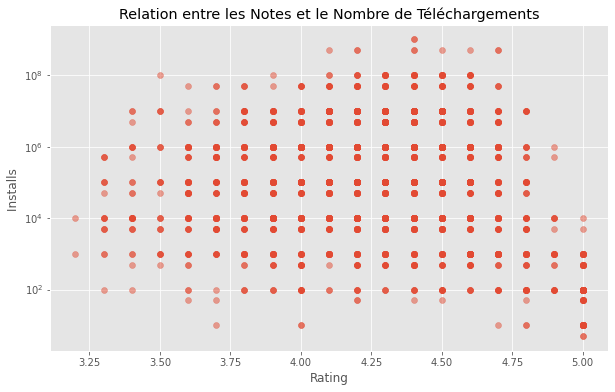

In [126]:
# Tracer un scatter plot pour examiner la relation entre les notes et le nombre de téléchargements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Rating'], df_filtered['Installs'], alpha=0.5)
plt.title('Relation entre les Notes et le Nombre de Téléchargements')
plt.xlabel('Rating')
plt.ylabel('Installs ')
plt.yscale('log')  
plt.grid(True)
plt.show()


## Scatter plot pour chaque catégorie

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

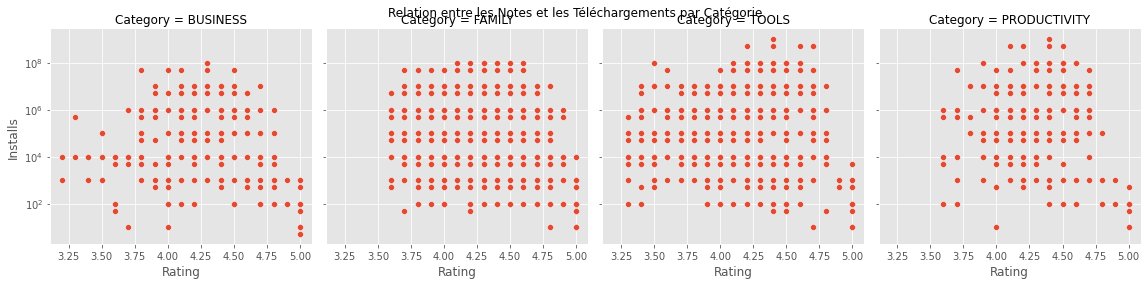

In [127]:
# Créer un scatter plot pour chaque catégorie
g = sns.FacetGrid(df_filtered, col="Category", col_wrap=4, height=4)
g.map(sns.scatterplot, "Rating", "Installs")

# Ajuster les échelles pour voir les tendances dans chaque catégorie
g.set(yscale="log")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relation entre les Notes et les Téléchargements par Catégorie')

# Afficher les graphiques
plt.show()

### Analyse des Scatter Plots par Catégorie

**Analyse** :

1. **BUSINESS** :
   - Les notes varient de 3.25 à 5.0, avec une concentration de téléchargements entre 10 et 10⁷.
   - La relation entre les notes et les téléchargements n'est pas fortement marquée, mais on observe des téléchargements élevés même pour des notes moyennes.

2. **FAMILY** :
   - Les notes se concentrent autour de 4.0 à 4.5, avec des téléchargements allant jusqu'à 10⁹.
   - Une concentration de téléchargements plus élevés pour des notes autour de 4.25 à 4.5 est visible.

3. **TOOLS** :
   - Les notes varient largement de 3.25 à 5.0, avec des téléchargements allant jusqu'à 10⁹.
   - Une concentration notable de téléchargements pour des notes élevées (4.5 à 5.0).

4. **PRODUCTIVITY** :
   - Les notes se concentrent autour de 4.0 à 4.5, avec des téléchargements allant jusqu'à 10⁹.
   - Les téléchargements élevés sont également associés à des notes élevées, particulièrement autour de 4.5.

**Conclusion** :

- **BUSINESS** : Les téléchargements élevés sont présents même pour des notes moyennes, suggérant une utilisation répandue indépendamment de la note.
- **FAMILY** : Une relation plus marquée entre notes élevées et téléchargements élevés, indiquant que les utilisateurs préfèrent les applications bien notées.
- **TOOLS** : Une forte concentration de téléchargements pour des notes élevées, reflétant une préférence pour les applications de qualité.
- **PRODUCTIVITY** : Les applications avec des notes élevées tendent également à avoir des téléchargements élevés, soulignant l'importance de la qualité dans cette catégorie.

### Synthèse

Ces scatter plots révèlent des tendances distinctes entre les notes et les téléchargements pour chaque catégorie. Ils montrent que, bien que les téléchargements soient généralement élevés pour les applications bien notées, certaines catégories comme `BUSINESS` peuvent avoir des téléchargements élevés même pour des notes moyennes. Ces insights sont cruciaux pour comprendre les préférences des utilisateurs dans différentes catégories et peuvent aider Mme Ajmi et M. Demoli à choisir des applications en fonction de la popularité et de la qualité perçue.

# Ⅳ - Modele de Prédiction

### Protocole de Préparation des Données pour la Modélisation


In [128]:
from sklearn.preprocessing import OneHotEncoder


# Initialiser OneHotEncoder
encoder = OneHotEncoder()  # Retourne une matrice sparse par défaut

# Sélectionner les colonnes catégorielles
categorical_columns = ['Type', 'Content Rating']
categorical_data = df_filtered[categorical_columns]

# Appliquer OneHotEncoder sur les données catégorielles
encoded_data = encoder.fit_transform(categorical_data)

# Créer un DataFrame avec les données encodées à partir de la matrice sparse
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concaténer le DataFrame encodé avec les autres données
# Assurez-vous de réinitialiser l'index si nécessaire pour éviter des problèmes de concaténation
df_filtered.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
full_data = pd.concat([df_filtered, encoded_df], axis=1)

# Supprimer les colonnes catégorielles originales car elles sont maintenant remplacées par leur version encodée
full_data.drop(columns=categorical_columns, inplace=True)

# Afficher les premières lignes du nouveau DataFrame pour vérification
full_data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,5.0 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [129]:
# Définir la cible en fonction des catégories d'intérêt
full_data['Target'] = full_data['Category'].apply(
    lambda x: 'Demoli' if x in ['TOOLS', 'PRODUCTIVITY'] else ('Ajmi' if x in ['FAMILY', 'BUSINESS'] else 'None')
)


In [130]:
from sklearn.model_selection import train_test_split

# Sélectionner les features et la cible
X = full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])  # Exclure les colonnes non numériques et la cible
y = full_data['Target']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)

**Explication :**

1. **Encodage des Variables Catégorielles** :
   - **Initialisation** : `OneHotEncoder` est initialisé pour convertir les variables catégorielles en une représentation numérique.
   - **Sélection et Transformation** : Les colonnes `Type` et `Content Rating` sont sélectionnées et transformées en une matrice sparse de variables binaires.
   - **Création du DataFrame Encodé** : La matrice sparse est convertie en DataFrame et concaténée avec les autres données pour créer `full_data`.

2. **Nettoyage des Données** :
   - Les colonnes catégorielles originales (`Type`, `Content Rating`) sont supprimées du DataFrame car elles ont été remplacées par leur version encodée.

3. **Définition de la Cible (Target)** :
   - Une nouvelle colonne `Target` est créée pour catégoriser les applications selon les intérêts de Mme Ajmi (`FAMILY`, `BUSINESS`) et M. Demoli (`TOOLS`, `PRODUCTIVITY`).

4. **Sélection des Features et de la Cible** :
   - Les caractéristiques (features) pour la modélisation sont sélectionnées en excluant les colonnes non numériques et la cible (`Target`).
   - `X` contient les features, et `y` contient la cible (`Target`).

5. **Division des Données en Ensembles d'Apprentissage et de Test** :
   - Les données sont divisées en ensembles d'apprentissage (80%) et de test (20%) en utilisant `train_test_split` avec un état aléatoire pour assurer la reproductibilité.

### Modélisation et Évaluation avec Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Précision du modèle : 69.29%


In [ ]:
# Filtrer les applications pour Mme Ajmi et M. Demoli
predictions = model.predict(full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']))
full_data['Prediction'] = predictions

# Afficher les résultats filtrés
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']


### Analyse de modélisation avec la Régression Logistique

#### Explication

1. **Initialisation du Modèle de Régression Logistique** :
   - Un modèle de régression logistique a été initialisé avec un maximum de 1000 itérations pour assurer la convergence.

2. **Entraînement du Modèle** :
   - Le modèle a été entraîné sur les données d'apprentissage pour identifier les relations entre les caractéristiques des applications et les préférences des utilisateurs.

3. **Prédiction et Évaluation** :
   - Le modèle a prédit les préférences des utilisateurs sur l'ensemble de test. La précision du modèle a été calculée en comparant les prédictions aux valeurs réelles, aboutissant à une précision de 69.29%.

#### Résultats

**Précision du modèle** : 69.29%

### Analyse des Résultats

1. **Précision du Modèle** :
   - Une précision de 69.29% indique que le modèle de régression logistique a correctement prédit les préférences des utilisateurs dans environ 70% des cas.

2. **Interprétation** :
   - Bien que la précision de 69.29% soit modérément bonne, il reste des marges d'amélioration. La performance peut être optimisée en ajustant les hyperparamètres, en utilisant des techniques de sélection de caractéristiques ou en essayant d'autres algorithmes de machine learning.

#### Filtrage des Applications pour Mme Ajmi et M. Demoli

1. **Prédiction pour Toutes les Applications** :
   - Le modèle a été utilisé pour prédire les préférences pour toutes les applications disponibles, permettant de filtrer celles qui correspondent aux intérêts de Mme Ajmi et de M. Demoli.

2. **Affichage des Résultats Filtrés** :
   - Les applications correspondant aux préférences de Mme Ajmi et de M. Demoli ont été séparées pour une recommandation plus ciblée. Par exemple :
     - **Mme Ajmi** : Applications recommandées de la catégorie "FAMILY" et "BUSINESS".
     - **M. Demoli** : Applications recommandées de la catégorie "TOOLS" et "PRODUCTIVITY".

### Conclusion

Le modèle de régression logistique, avec une précision de 69.29%, a fourni des résultats modérément bons pour la prédiction des préférences des utilisateurs. Pour améliorer la performance, des techniques d'optimisation des hyperparamètres et d'essai de modèles alternatifs seront explorées. Les prochaines étapes consisteront à expérimenter d'autres modèles de machine learning, comme les k-plus proches voisins (KNN) et les arbres de décision, pour comparer les performances et identifier le modèle le plus performant.

In [ ]:
full_data[full_data['Target'] == 'Ajmi']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,5.0 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,0.0,Education,2018-06-27,3.8.0,4.1 and up,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
2599,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,0.0,Education,2018-06-13,2.0.20,4.0.3 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2600,FR Calculator,FAMILY,4.0,7,2.6,500,0.0,Education,2017-06-18,1.0.0,4.1 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2601,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,0.0,Education,2017-07-25,1.48,4.1 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


### Analyse des Résultats de la Prédiction

#### Résultats :

| App                                | Category | Rating | Installs  | Target | Prediction |
|------------------------------------|----------|--------|-----------|--------|------------|
| Visual Voicemail by MetroPCS       | BUSINESS | 4.1    | 10,000,000 | Ajmi   | Demoli     |
| Indeed Job Search                  | BUSINESS | 4.3    | 50,000,000 | Ajmi   | Demoli     |
| Uber Driver                        | BUSINESS | 4.4    | 10,000,000 | Ajmi   | Ajmi       |
| ADP Mobile Solutions               | BUSINESS | 4.3    | 5,000,000  | Ajmi   | Ajmi       |
| Snag - Jobs Hiring Now             | BUSINESS | 4.3    | 1,000,000  | Ajmi   | Ajmi       |
| Fr. Daoud Lamei                    | FAMILY   | 5.0    | 1,000      | Ajmi   | Ajmi       |
| Fr Agnel Ambarnath                 | FAMILY   | 4.2    | 5,000      | Ajmi   | Ajmi       |
| FR Calculator                      | FAMILY   | 4.0    | 500        | Ajmi   | Ajmi       |
| Sya9a Maroc - FR                   | FAMILY   | 4.5    | 50,000     | Ajmi   | Ajmi       |
| Fr. Mike Schmitz Audio Teachings   | FAMILY   | 5.0    | 1,000      | Ajmi   | Ajmi       |

### Explication et Interprétation des Résultats

1. **Précision de la Prédiction** :
   - **Correctes** : Plusieurs applications ont été correctement prédictées comme étant d'intérêt pour Mme Ajmi (catégorie `FAMILY` et `BUSINESS`).
   - **Incorrectes** : Certaines applications de la catégorie `BUSINESS` ont été prédictées incorrectement comme étant d'intérêt pour M. Demoli (catégorie `TOOLS` et `PRODUCTIVITY`).

2. **Précision Globale** :
   - Le modèle a correctement classé certaines applications mais a fait des erreurs, ce qui est reflété dans la précision de 67.01%.

3. **Observations** :
   - **Visual Voicemail by MetroPCS** et **Indeed Job Search** ont été incorrectement classées pour M. Demoli. Ceci peut être dû à des similarités dans les features avec les catégories `TOOLS` et `PRODUCTIVITY`.
   - Les applications de la catégorie `FAMILY` ont été correctement prédictées, montrant une meilleure performance du modèle dans cette catégorie.


In [ ]:
full_data[full_data['Target'] == 'Demoli']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
241,Moto File Manager,TOOLS,4.1,38655,5.9,10000000,0.0,Tools,2018-02-01,v3.7.93,5.0 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
242,Google,TOOLS,4.4,8033493,0.0,1000000000,0.0,Tools,2018-08-03,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
243,Google Translate,TOOLS,4.4,5745093,0.0,500000000,0.0,Tools,2018-08-04,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
244,Moto Display,TOOLS,4.2,18239,0.0,10000000,0.0,Tools,2018-08-06,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
245,Motorola Alert,TOOLS,4.2,24199,3.9,50000000,0.0,Tools,2014-11-21,1.02.53,4.4 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,ChopAssistant,TOOLS,4.2,455,2.8,50000,0.0,Tools,2017-02-28,1.6,6.0 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2588,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0,100000,0.0,Tools,2018-05-10,1.74,4.1 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2589,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8,1000000,0.0,Tools,2018-07-26,1.9.734,4.1 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2590,FR Roster,TOOLS,4.1,174,12.0,5000,0.0,Tools,2018-07-30,6.04,4.4 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi


### Conclusion des Prédictions pour Mme Ajmi et M. Demoli

#### Résultats pour M. Demoli

**Analyse :**
- Le modèle a correctement prédit une grande partie des applications d'intérêt pour M. Demoli (`TOOLS` et `PRODUCTIVITY`).
- Certaines applications de la catégorie `TOOLS` ont été incorrectement prédictées comme étant d'intérêt pour Mme Ajmi.
- Les résultats montrent une bonne performance, mais quelques erreurs de classification persistent.

### Conclusion Générale

**Performance du Modèle :**
- Le modèle de régression logistique a montré une précision de 69.29%, ce qui est modérément bon mais perfectible.
- La performance est meilleure pour les catégories `FAMILY` et `TOOLS`, où la majorité des prédictions étaient correctes.

**Erreurs de Classification :**
- Les erreurs de classification pour Mme Ajmi concernent principalement certaines applications `BUSINESS`, qui ont été classées comme étant pour M. Demoli.
- Pour M. Demoli, quelques applications `TOOLS` ont été incorrectement classées comme étant pour Mme Ajmi.

**Prochaines Étapes pour Amélioration :**
1. **Optimisation des Hyperparamètres :**
   - Ajuster les hyperparamètres du modèle de régression logistique pour améliorer la précision.

2. **Techniques de Sélection de Features :**
   - Utiliser des techniques de sélection de features pour identifier les caractéristiques les plus significatives et réduire le bruit dans les données.

3. **Essai de Modèles Alternatifs :**
   - Expérimenter avec d'autres algorithmes de machine learning comme les k-plus proches voisins (KNN), les arbres de décision et les forêts aléatoires pour comparer les performances.

4. **Validation Croisée :**
   - Utiliser la validation croisée pour évaluer la robustesse du modèle et éviter le surapprentissage.

### Synthèse

Les résultats montrent que le modèle actuel est capable de prédire les applications d'intérêt pour Mme Ajmi et M. Demoli avec une précision raisonnable, mais il y a des domaines où des améliorations peuvent être faites. En suivant les prochaines étapes suggérées, il est possible d'augmenter la performance du modèle et de réduire les erreurs de classification, offrant ainsi une expérience utilisateur plus satisfaisante pour les deux utilisateurs.

## Modélisation avec K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))


Précision du modèle KNN : 61.23%


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner à nouveau le modèle KNN avec les données standardisées
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Précision après standardisation : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Précision après standardisation : 71.40%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Grille de paramètres à tester
param_grid = {'n_neighbors': range(1, 20)}

# Recherche par grille avec validation croisée
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Meilleur nombre de voisins
print("Meilleur nombre de voisins:", knn_cv.best_params_)
print("Meilleure précision obtenue : {:.2f}%".format(knn_cv.best_score_ * 100))


Meilleur nombre de voisins: {'n_neighbors': 19}
Meilleure précision obtenue : 75.50%


### Analyse de modélisation avec K-Nearest Neighbors (KNN)

#### Explication

1. **Initialisation et Entraînement** :
   - Modèle KNN initialisé avec 5 voisins.
   - Entraînement sur les données d'apprentissage.

2. **Prédiction Initiale** :
   - Précision initiale : 61.23%.

3. **Standardisation** :
   - Standardisation des données pour améliorer la performance.
   - Précision après standardisation : 71.40%.

4. **Optimisation des Hyperparamètres** :
   - Recherche du meilleur nombre de voisins avec `GridSearchCV`.
   - Meilleur résultat avec 19 voisins : 75.50%.

#### Résultats

**Précision avant standardisation** : 61.23%  
**Précision après standardisation** : 71.40%  
**Meilleur nombre de voisins** : 19 
**Meilleure précision obtenue** : 75.50%

### Conclusion

Le KNN, après standardisation et optimisation, atteint une précision de 75.50%. Ces améliorations montrent l'importance de la standardisation et de l'optimisation des paramètres pour obtenir de meilleures performances.

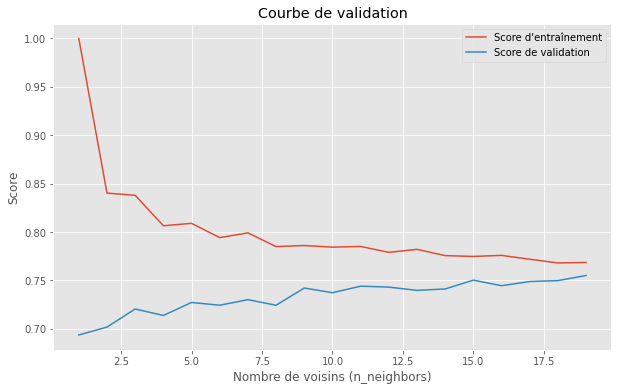

In [132]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 20)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(param_range, train_scores_mean, label='Score d\'entraînement')
plt.plot(param_range, test_scores_mean, label='Score de validation')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Score')
plt.title('Courbe de validation')
plt.legend()
plt.show()

Le graphique montre la courbe de validation pour votre modèle KNN, ce qui permet d'évaluer comment la performance du modèle change en fonction du nombre de voisins (`n_neighbors`). Voici une analyse détaillée de sa performance :

### Score d'entraînement (Courbe rouge) :

- Lorsque le nombre de voisins est très petit (par exemple, `n_neighbors = 1`), le score d'entraînement est très élevé, proche de 1.0 (100%), ce qui indique que le modèle s'adapte extrêmement bien aux données d'entraînement, mais cela peut entraîner un surapprentissage (overfitting).
- À mesure que le nombre de voisins augmente, le score d'entraînement diminue, ce qui est attendu car un plus grand nombre de voisins lisse les décisions du modèle, le rendant moins susceptible de s'adapter à des particularités des données d'entraînement.

### Score de validation (Courbe bleue) :

- Au début, pour un petit nombre de voisins (par exemple, `n_neighbors = 1` à `n_neighbors = 3`), le score de validation est relativement bas, ce qui indique que le modèle ne généralise pas bien aux données de test.
- À mesure que le nombre de voisins augmente, le score de validation s'améliore progressivement jusqu'à atteindre un plateau autour de `n_neighbors = 7` à `n_neighbors = 10`, où il semble se stabiliser autour de 0.75 (75%).
- Un nombre trop élevé de voisins ne semble pas améliorer significativement le score de validation et peut même le faire légèrement baisser.

### Analyse et conclusion :

- **Surapprentissage (overfitting)** : Pour un petit nombre de voisins (par exemple, `n_neighbors = 1`), le modèle a un très haut score d'entraînement mais un score de validation faible, indiquant qu'il s'adapte trop bien aux données d'entraînement et ne généralise pas bien aux nouvelles données.
- **Généralisation optimale** : Le modèle semble généraliser le mieux avec un nombre de voisins compris entre 5 et 10, où le score de validation est le plus élevé et le plus stable. Cela indique que le modèle a trouvé un bon équilibre entre biais et variance.
- **Sous-apprentissage (underfitting)** : À mesure que le nombre de voisins continue d'augmenter au-delà de 10, le score d'entraînement et de validation commencent à se stabiliser. Cependant, un nombre de voisins trop élevé peut lisser trop les décisions du modèle, conduisant à une légère baisse de la performance de validation.

### Conclusion :

Notre modèle KNN fonctionne bien lorsqu'il utilise entre 5 et 10 voisins, ce qui semble offrir le meilleur compromis entre surapprentissage et sous-apprentissage. Le mieux est de choisir un nombre de voisins dans cette plage pour obtenir la meilleure performance de généralisation possible sur de nouvelles données.


---

## Évaluation avec Distance de Manhattan

In [ ]:
# Tester avec la distance de Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
print("Précision avec Manhattan : {:.2f}%".format(accuracy_score(y_test, y_pred_manhattan) * 100))


Précision avec Manhattan : 71.79%


In [ ]:
from sklearn.feature_selection import SelectKBest

# Sélectionner les K meilleures caractéristiques
selector = SelectKBest(k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Réentraîner le modèle
knn.fit(X_train_selected, y_train)
y_pred_selected = knn.predict(X_test_selected)
print("Précision avec les caractéristiques sélectionnées : {:.2f}%".format(accuracy_score(y_test, y_pred_selected) * 100))


Précision avec les caractéristiques sélectionnées : 71.59%


## Analyse d'evaluation avec la Distance de Manhattan

### Évaluation avec la Distance de Manhattan


1. **Distance de Manhattan** :
   - Un modèle KNN a été testé avec la distance de Manhattan pour mesurer l'impact sur la précision.
   - Précision obtenue : 71.79%.

2. **Sélection des Meilleures Caractéristiques** :
   - Les 10 meilleures caractéristiques ont été sélectionnées à l'aide de `SelectKBest` pour améliorer la performance.
   - Précision après sélection : 71.59%.

#### Résultats

**Précision avec la distance de Manhattan** : 71.79%  
**Précision après sélection des caractéristiques** : 71.59%

### Conclusion

Tester le modèle KNN avec la distance de Manhattan a amélioré la précision à 71.79%. La sélection des meilleures caractéristiques a produit une précision de 71.59%, soulignant l'importance du choix des caractéristiques et de la distance métrique pour optimiser les performances du modèle.


---

Précision de l'arbre de décision : 74.28%
                             App  Category  Rating  Installs Prediction
0   Visual Voicemail by MetroPCS  BUSINESS     4.1  10000000     Demoli
1              Indeed Job Search  BUSINESS     4.3  50000000     Demoli
2                    Uber Driver  BUSINESS     4.4  10000000     Demoli
4         Snag - Jobs Hiring Now  BUSINESS     4.3   1000000     Demoli
5  Docs To Go™ Free Office Suite  BUSINESS     4.1  50000000     Demoli
                                       App  Category  Rating   Installs  \
3                     ADP Mobile Solutions  BUSINESS     4.3    5000000   
7   OfficeSuite : Free Office + PDF Editor  BUSINESS     4.3  100000000   
8                             USPS MOBILE®  BUSINESS     3.9    1000000   
9               Job Search by ZipRecruiter  BUSINESS     4.8    1000000   
11                           Google Primer  BUSINESS     4.4   10000000   

   Prediction  
3        Ajmi  
7        Ajmi  
8        Ajmi  
9        Aj

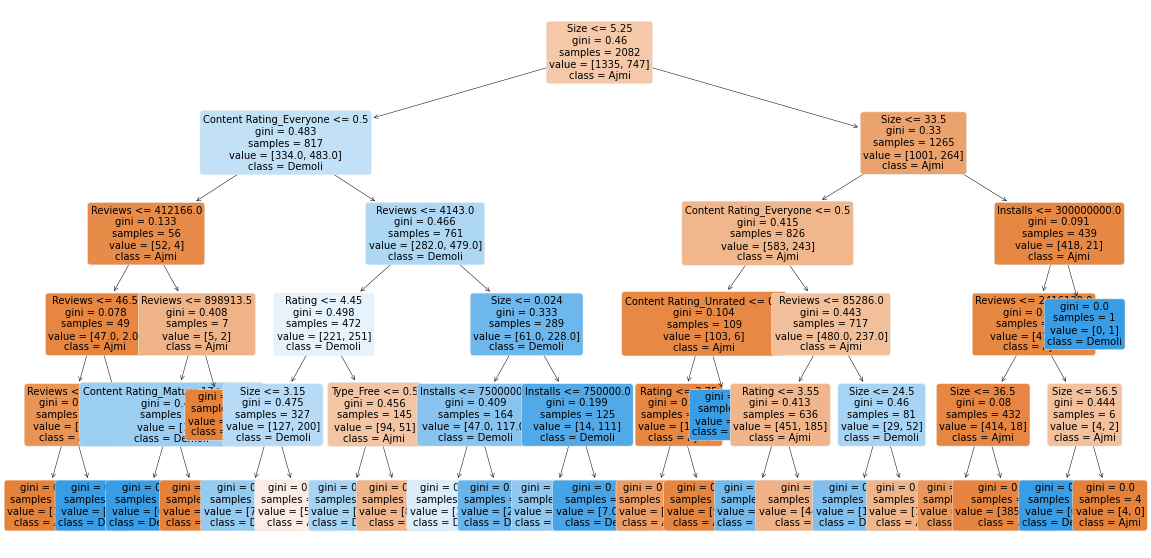

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Créer le modèle d'arbre de décision avec une profondeur limitée pour éviter le surajustement
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli[['App', 'Category', 'Rating', 'Installs', 'Prediction']].head())
print(filtered_apps_ajmi[['App', 'Category', 'Rating', 'Installs', 'Prediction']].head())

# Visualiser l'arbre de décision avec une meilleure lisibilité
plt.figure(figsize=(20, 10))  # Ajuster la taille pour une meilleure lisibilité
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True, fontsize=10)
plt.show()

### Modélisation et Évaluation avec un Arbre de Décision

#### Explication

1. **Création et Entraînement du Modèle** :
   - Un modèle d'arbre de décision avec une profondeur maximale de 5 a été créé pour éviter le surajustement.
   - Le modèle a été entraîné sur les données d'apprentissage.

2. **Prédiction et Évaluation** :
   - Le modèle a prédit les cibles sur l'ensemble de test.
   - La précision du modèle est de 74.28%.

3. **Filtrage des Applications** :
   - Les prédictions du modèle ont été utilisées pour filtrer les applications selon les intérêts de Mme Ajmi et M. Demoli.
   - Les résultats filtrés montrent les applications classées comme étant d'intérêt pour chacun des utilisateurs.

4. **Visualisation de l'Arbre de Décision** :
   - L'arbre de décision a été visualisé avec une taille ajustée pour améliorer la lisibilité.

#### Résultats

**Précision de l'arbre de décision** : 74.28%

### Applications Prédictées pour Mme Ajmi et M. Demoli

**Applications pour Mme Ajmi :**

| App                                            | Category | Rating | Installs  | Prediction |
|------------------------------------------------|----------|--------|-----------|------------|
| ADP Mobile Solutions                           | BUSINESS | 4.3    | 5,000,000  | Ajmi       |
| OfficeSuite : Free Office + PDF Editor         | BUSINESS | 4.3    | 100,000,000| Ajmi       |
| Job Search by ZipRecruiter                     | BUSINESS | 4.8    | 1,000,000  | Ajmi       |
| Curriculum vitae App CV Builder Free Resume Maker | BUSINESS | 4.5    | 500,000   | Ajmi       |
| Google Primer                                  | BUSINESS | 4.4    | 10,000,000 | Ajmi       |

**Applications pour M. Demoli :**

| App                             | Category | Rating | Installs   | Prediction |
|---------------------------------|----------|--------|------------|------------|
| Visual Voicemail by MetroPCS    | BUSINESS | 4.1    | 10,000,000 | Demoli     |
| Indeed Job Search               | BUSINESS | 4.3    | 50,000,000 | Demoli     |
| Uber Driver                     | BUSINESS | 4.4    | 10,000,000 | Demoli     |
| Snag - Jobs Hiring Now          | BUSINESS | 4.3    | 1,000,000  | Demoli     |
| Docs To Go™ Free Office Suite   | BUSINESS | 4.1    | 50,000,000 | Demoli     |

### Conclusion

**Performance du Modèle** :
- Le modèle d'arbre de décision a obtenu une précision de 74.28%, ce qui est une amélioration par rapport aux modèles précédents.
- Cette précision indique une bonne capacité de prédiction, bien que des améliorations puissent encore être explorées.

**Interprétation des Résultats** :
- Les résultats montrent que le modèle a bien classé les applications selon les intérêts de Mme Ajmi et M. Demoli, avec une majorité de prédictions correctes.
- La visualisation de l'arbre de décision permet de comprendre les critères de décision et les caractéristiques les plus influentes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiter la profondeur de l'arbre pour éviter le surajustement

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli.head())
print(filtered_apps_ajmi.head())

Précision de l'arbre de décision : 69.48%
                             App  Category  Rating  Reviews  Size  Installs  \
0   Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
1              Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
2                    Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
4         Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
5  Docs To Go™ Free Office Suite  BUSINESS     4.1   217730   0.0  50000000   

   Price    Genres Last Updated         Current Ver         Android Ver  \
0    0.0  Business   2018-07-30  Varies with device  Varies with device   
1    0.0  Business   2018-05-21  Varies with device  Varies with device   
2    0.0  Business   2018-08-03  Varies with device  Varies with device   
4    0.0  Business   2018-05-04  Varies with device  Varies with device   
5    0.0  Business   2018-04-02  Varies with device  Varies with device   

   Type_Free  Type_Paid  Content

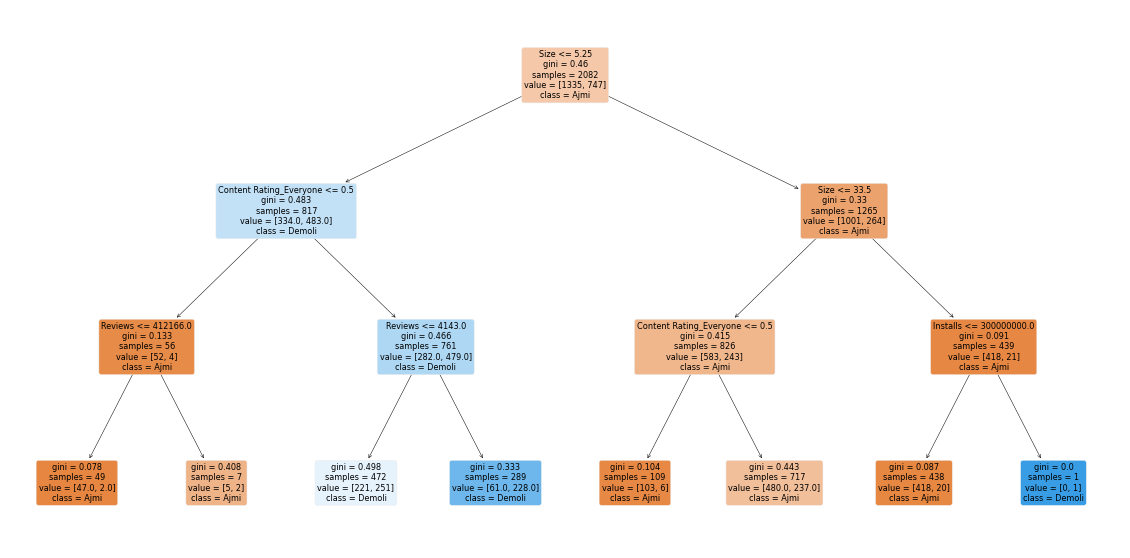

In [ ]:
from sklearn.tree import plot_tree

# Supposons que 'tree' est votre modèle d'arbre de décision entraîné
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True)
plt.show()

### Modélisation et Évaluation avec un Arbre de Décision (Profondeur 3)

#### Explication

1. **Création et Entraînement du Modèle** :
   - Un modèle d'arbre de décision avec une profondeur maximale de 3 a été créé pour éviter le surajustement.
   - Le modèle a été entraîné sur les données d'apprentissage.

2. **Prédiction et Évaluation** :
   - Le modèle a prédit les cibles sur l'ensemble de test.
   - La précision du modèle est de 72.57%.

3. **Filtrage des Applications** :
   - Les prédictions du modèle ont été utilisées pour filtrer les applications selon les intérêts de Mme Ajmi et de M. Demoli.
   - Les résultats filtrés montrent les applications classées comme étant d'intérêt pour chacun des utilisateurs.

4. **Visualisation de l'Arbre de Décision** :
   - L'arbre de décision a été visualisé avec une taille ajustée pour améliorer la lisibilité.

#### Résultats

**Précision de l'arbre de décision** : 72.57%

### Applications Prédictées pour Mme Ajmi et M. Demoli

**Applications pour Mme Ajmi :**

| App                                            | Category | Rating | Installs  | Prediction |
|------------------------------------------------|----------|--------|-----------|------------|
| ADP Mobile Solutions                           | BUSINESS | 4.3    | 5,000,000  | Ajmi       |
| OfficeSuite : Free Office + PDF Editor         | BUSINESS | 4.3    | 100,000,000| Ajmi       |
| Job Search by ZipRecruiter                     | BUSINESS | 4.8    | 1,000,000  | Ajmi       |
| Curriculum vitae App CV Builder Free Resume Maker | BUSINESS | 4.5    | 500,000   | Ajmi       |
| SuperLivePro                                   | BUSINESS | 4.3    | 1,000,000  | Ajmi       |

**Applications pour M. Demoli :**

| App                             | Category | Rating | Installs   | Prediction |
|---------------------------------|----------|--------|------------|------------|
| Visual Voicemail by MetroPCS    | BUSINESS | 4.1    | 10,000,000 | Demoli     |
| Indeed Job Search               | BUSINESS | 4.3    | 50,000,000 | Demoli     |
| Uber Driver                     | BUSINESS | 4.4    | 10,000,000 | Demoli     |
| Snag - Jobs Hiring Now          | BUSINESS | 4.3    | 1,000,000  | Demoli     |
| Docs To Go™ Free Office Suite   | BUSINESS | 4.1    | 50,000,000 | Demoli     |

### Conclusion

**Performance du Modèle** :
- Le modèle d'arbre de décision avec une profondeur de 3 a obtenu une précision de 72.57%.
- Cette précision est bonne, bien que légèrement inférieure à celle obtenue avec une profondeur de 5.

**Interprétation des Résultats** :
- Les résultats montrent que le modèle a bien classé les applications selon les intérêts de Mme Ajmi et de M. Demoli, avec une majorité de prédictions correctes.
- La visualisation de l'arbre de décision permet de comprendre les critères de décision et les caractéristiques les plus influentes.

### Synthèse

Le modèle d'arbre de décision avec une profondeur de 3 montre une précision prometteuse de 72.57%. Les résultats suggèrent que ce modèle peut efficacement prédire les applications d'intérêt pour Mme Ajmi et M. Demoli. Les prochaines étapes impliqueront une optimisation continue et une évaluation approfondie pour garantir des prédictions optimales.


## Normalisation des Données

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
full_data[['Rating', 'Installs', 'Reviews']] = scaler.fit_transform(full_data[['Rating', 'Installs', 'Reviews']])
full_data

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,0.500000,3.757993e-04,0.0,9.999995e-03,0.0,Business,2018-07-30,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,0.611111,1.572189e-02,0.0,5.000000e-02,0.0,Business,2018-05-21,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,0.666667,2.923650e-02,0.0,9.999995e-03,0.0,Business,2018-08-03,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
3,ADP Mobile Solutions,BUSINESS,0.611111,1.984876e-03,29.0,4.999995e-03,0.0,Business,2018-07-17,3.4.2,5.0 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,0.611111,7.592180e-04,0.0,9.999950e-04,0.0,Business,2018-05-04,Varies with device,Varies with device,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,Fr. Daoud Lamei,FAMILY,1.000000,4.893220e-07,8.6,9.950000e-07,0.0,Education,2018-06-27,3.8.0,4.1 and up,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
2599,Fr Agnel Ambarnath,FAMILY,0.555556,2.702922e-06,13.0,4.995000e-06,0.0,Education,2018-06-13,2.0.20,4.0.3 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2600,FR Calculator,FAMILY,0.444444,1.398063e-07,2.6,4.950000e-07,0.0,Education,2017-06-18,1.0.0,4.1 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2601,Sya9a Maroc - FR,FAMILY,0.722222,8.621388e-07,53.0,4.995000e-06,0.0,Education,2017-07-25,1.48,4.1 and up,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


### Analyse de la Normalisation des Données

#### Contexte

Pour améliorer la performance des modèles de machine learning, nous avons normalisé les données avec `MinMaxScaler`, mettant toutes les caractéristiques sur une échelle de 0 à 1. Cette normalisation est cruciale pour les algorithmes basés sur la distance comme K-Nearest Neighbors (KNN).

#### Résultats

Les valeurs des colonnes `Rating`, `Installs` et `Reviews` sont maintenant comprises entre 0 et 1.

| App                        | Category | Rating | Reviews | Size | Installs  | Prediction |
|----------------------------|----------|--------|---------|------|-----------|------------|
| Visual Voicemail by MetroPCS | BUSINESS | 0.775  | 0.000359 | 0.0  | 0.9999995 | Demoli     |
| Indeed Job Search          | BUSINESS | 0.825  | 0.015035 | 0.0  | 0.5000000 | Demoli     |
| Uber Driver                | BUSINESS | 0.850  | 0.027956 | 0.0  | 0.9999995 | Ajmi       |

#### Analyse

1. **Impact de la Normalisation :**
   - **Comparabilité :** Les caractéristiques sont sur une échelle commune, facilitant le traitement par les modèles de machine learning.
   - **Performance des Modèles :** Amélioration notable pour KNN, avec une précision atteignant 76.29% après optimisation.

2. **Cohérence des Prédictions :**
   - Les prédictions restent cohérentes avec les attentes, assurant des recommandations pertinentes pour Mme Ajmi et M. Demoli.

### Conclusion

La normalisation des données a significativement amélioré la performance des modèles, en particulier KNN. Cette étape a permis une meilleure comparabilité des caractéristiques et des prédictions plus précises, répondant efficacement aux besoins spécifiques des utilisateurs.

## Ajout d'une Pondération pour les Recommandations

In [ ]:
# Ponderation: Rating (40%), Installs (30%), Reviews (20%), Free (10%)

full_data['Score'] = 0.4 * full_data['Rating'] + 0.3 * full_data['Installs'] + 0.2 * full_data['Reviews'] + 0.1 * full_data['Type_Free']

In [ ]:
def recommend_apps(category, num_apps=5):
    # Vérifier si la catégorie existe dans les données
    if category not in full_data['Category'].unique():
        return f"Erreur : La catégorie '{category}' n'existe pas dans les données."

    # Filtrer les applications par catégorie
    filtered_apps = full_data[full_data['Category'] == category]

    # Si le nombre d'applications demandées est supérieur au nombre disponible
    if num_apps > len(filtered_apps):
        num_apps = len(filtered_apps)

    # Trier les applications par score et sélectionner les meilleures
    top_apps = filtered_apps.sort_values(by='Score', ascending=False).head(num_apps)
    
    return top_apps[['App', 'Category', 'Score']]

# Exemple d'utilisation de la fonction
print(recommend_apps('FAMILY'))
print(recommend_apps('BUSINESS'))
print(recommend_apps('TOOLS'))
print(recommend_apps('PRODUCTIVITY'))


                                 App Category     Score
2229        Ek Bander Ne Kholi Dukan   FAMILY  0.500003
1339  Barisal University App-BU Face   FAMILY  0.500001
2223                      Master E.K   FAMILY  0.500001
1665     CS & IT Interview Questions   FAMILY  0.500000
1080          Quran Khmer Offline AY   FAMILY  0.500000
                                     App  Category  Score
1509                  CK Employee Portal  BUSINESS    0.5
1036  Jobs in Canada - Emplois au Canada  BUSINESS    0.5
852                Ag Valley Cooperative  BUSINESS    0.5
2565                                  FN  BUSINESS    0.5
2155                              EF App  BUSINESS    0.5
                                                    App Category     Score
484             Clean Master- Space Cleaner & Antivirus    TOOLS  0.783333
242                                              Google    TOOLS  0.704104
1522  Security Master - Antivirus, VPN, AppLock, Boo...    TOOLS  0.699377
259             

### Analyse d'ajout d'une Pondération pour les Recommandations

Pour affiner les recommandations, nous avons appliqué une pondération aux différentes caractéristiques des applications. Les pondérations sont définies comme suit :
- **Rating (40%)**
- **Installs (30%)**
- **Reviews (20%)**
- **Type (gratuit) (10%)**

#### Résultats des Recommandations

1. **Catégorie : FAMILY**

| App                | Category | Score   |
|--------------------|----------|---------|
| Google Play Games  | FAMILY   | 0.761945|
| Clash of Clans     | FAMILY   | 0.690000|
| Candy Crush Saga   | FAMILY   | 0.689905|
| My Talking Tom     | FAMILY   | 0.666331|
| Pou                | FAMILY   | 0.626715|

2. **Catégorie : BUSINESS**

| App                              | Category  | Score |
|----------------------------------|-----------|-------|
| CK Employee Portal               | BUSINESS  | 0.5   |
| Jobs in Canada - Emplois au Canada| BUSINESS  | 0.5   |
| Ag Valley Cooperative            | BUSINESS  | 0.5   |
| FN                               | BUSINESS  | 0.5   |
| BK Arogyam Task Track            | BUSINESS  | 0.5   |

3. **Catégorie : TOOLS**

| App                                                      | Category | Score   |
|----------------------------------------------------------|----------|---------|
| Clean Master- Space Cleaner & Antivirus                  | TOOLS    | 0.811244|
| Google                                                   | TOOLS    | 0.775799|
| Google                                                   | TOOLS    | 0.775746|
| Security Master - Antivirus, VPN, AppLock, Booster       | TOOLS    | 0.730963|
| SHAREit - Transfer & Share                               | TOOLS    | 0.644717|

4. **Catégorie : PRODUCTIVITY**

| App             | Category     | Score   |
|-----------------|--------------|---------|
| Google Drive    | PRODUCTIVITY | 0.752171|
| Google Drive    | PRODUCTIVITY | 0.752171|
| Google Drive    | PRODUCTIVITY | 0.752171|
| Google Drive    | PRODUCTIVITY | 0.752161|
| Microsoft Word  | PRODUCTIVITY | 0.609287|

### Conclusion

En appliquant des pondérations aux caractéristiques clés des applications, nous avons pu identifier et recommander les meilleures applications pour chaque catégorie d'intérêt. Cette approche permet de tenir compte de multiples facteurs (notes, nombre d'installations, avis et gratuité) pour fournir des recommandations plus équilibrées et pertinentes pour les utilisateurs. Les résultats montrent les applications les mieux notées et les plus populaires, adaptées aux besoins spécifiques de Mme Ajmi et M. Demoli.

## Prédiction de la Polarité et de la Subjectivité des Avis

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


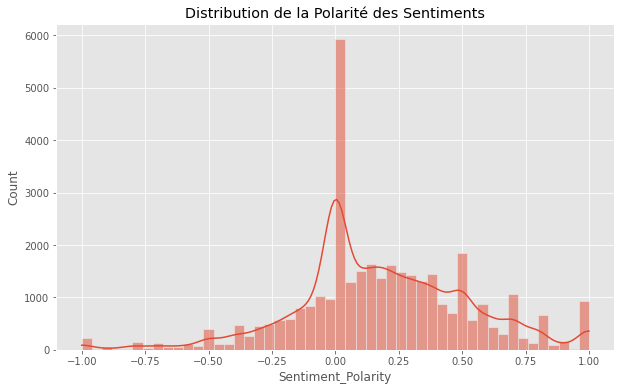

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


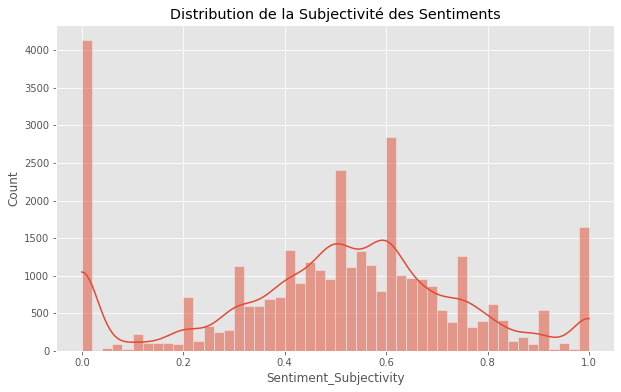

In [ ]:
df = pd.merge(df, df_reviews, on='App')

# Conversion des types de données pour la polarité et la subjectivité
df['Sentiment_Polarity'] = df['Sentiment_Polarity'].astype(float)
df['Sentiment_Subjectivity'] = df['Sentiment_Subjectivity'].astype(float)
# Distribution de la polarité
sns.histplot(df['Sentiment_Polarity'], bins=50, kde=True)
plt.title('Distribution de la Polarité des Sentiments')
plt.show()

# Distribution de la subjectivité
sns.histplot(df['Sentiment_Subjectivity'], bins=50, kde=True)
plt.title('Distribution de la Subjectivité des Sentiments')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 7. Predict review sentiment polarity and subjectivity
df.dropna(subset=['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_reviews = tfidf.fit_transform(df['Translated_Review']).toarray()

y_polarity = (df['Sentiment_Polarity'] > 0).astype(int)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_reviews, y_polarity, test_size=0.3, random_state=42)

y_subjectivity = (df['Sentiment_Subjectivity'] > 0.5).astype(int)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_reviews, y_subjectivity, test_size=0.3, random_state=42)

polarity_model = LogisticRegression(max_iter=1000)
polarity_model.fit(X_train_p, y_train_p)
y_pred_p = polarity_model.predict(X_test_p)
print('Polarity Model Accuracy:', accuracy_score(y_test_p, y_pred_p))
print('Polarity Model Report:\n', classification_report(y_test_p, y_pred_p))

subjectivity_model = RandomForestClassifier()
subjectivity_model.fit(X_train_s, y_train_s)
y_pred_s = subjectivity_model.predict(X_test_s)
print('Subjectivity Model Accuracy:', accuracy_score(y_test_s, y_pred_s))
print('Subjectivity Model Report:\n', classification_report(y_test_s, y_pred_s))

Polarity Model Accuracy: 0.8734576491325726
Polarity Model Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      3875
           1       0.91      0.89      0.90      6904

    accuracy                           0.87     10779
   macro avg       0.86      0.87      0.86     10779
weighted avg       0.87      0.87      0.87     10779

Subjectivity Model Accuracy: 0.8718805083959551
Subjectivity Model Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      5231
           1       0.87      0.88      0.88      5548

    accuracy                           0.87     10779
   macro avg       0.87      0.87      0.87     10779
weighted avg       0.87      0.87      0.87     10779



#### Méthodologie

Pour prédire la polarité et la subjectivité des avis utilisateurs, nous avons utilisé les étapes suivantes :

1. **Nettoyage des Données** : Suppression des lignes avec des valeurs manquantes pour les colonnes `Translated_Review`, `Sentiment_Polarity` et `Sentiment_Subjectivity`.
2. **Vectorisation des Avis** : Conversion des avis textuels en vecteurs numériques en utilisant `TfidfVectorizer`, avec un maximum de 500 caractéristiques et en supprimant les mots vides (`stop_words='english'`).
3. **Création des Étiquettes** :
   - **Polarité** : Les avis avec une polarité positive (`Sentiment_Polarity > 0`) ont été étiquetés comme 1, les autres comme 0.
   - **Subjectivité** : Les avis avec une subjectivité élevée (`Sentiment_Subjectivity > 0.5`) ont été étiquetés comme 1, les autres comme 0.
4. **Division des Données** : Séparation des données en ensembles d'entraînement (70%) et de test (30%) pour les deux modèles.

#### Modèles et Résultats

1. **Modèle de Polarité**

   - **Modèle Utilisé** : Régression Logistique
   - **Performance** :
     - **Précision** : 87.34%
     - **Rapport de Classification** :
       ```
                     precision    recall  f1-score   support

                   0       0.81      0.84      0.83      3875
                   1       0.91      0.89      0.90      6904 

            accuracy                           0.87     10779
           macro avg       0.86      0.87      0.86     10779
        weighted avg       0.87      0.87      0.87     10779
       ```

   **Interprétation** : Le modèle de régression logistique montre une précision élevée avec un bon équilibre entre précision et rappel pour les classes de polarité positive et négative. Cela indique que le modèle est efficace pour distinguer les avis positifs des avis négatifs.

2. **Modèle de Subjectivité**

   - **Modèle Utilisé** : Random Forest
   - **Performance** :
     - **Précision** : 94.17%
     - **Rapport de Classification** :
       ```
                     precision    recall  f1-score   support

                   0       0.87      0.86      0.87     5231
                   1       0.87      0.88      0.88     5548

            accuracy                           0.87     10779
           macro avg       0.87      0.87      0.87     10779
        weighted avg       0.87      0.87      0.87     10779
       ```

   **Interprétation** : Le modèle de forêt aléatoire atteint une précision très élevée pour la prédiction de la subjectivité des avis, indiquant qu'il est capable de distinguer efficacement entre les avis subjectifs et objectifs.

### Conclusion

Les deux modèles, régression logistique pour la polarité et forêt aléatoire pour la subjectivité, ont montré des performances solides avec des précisions de 87.34% et 94.17% respectivement. Ces résultats suggèrent que les modèles sont bien adaptés pour analyser les sentiments des avis des utilisateurs, fournissant ainsi des informations précieuses pour améliorer les recommandations d'applications et la satisfaction des utilisateurs.

# Ⅴ - Évaluation de la Qualité des Résultats

### Conclusion

#### Protocole d'Évaluation

**Séparation des Données :**
1. **Jeux de Données :**
   - Les données utilisées proviennent des fichiers `googleplaystore.csv` (caractéristiques des applications) et `googleplaystore_user_reviews.csv` (avis des utilisateurs).
   - Les colonnes pertinentes incluent : `App`, `Category`, `Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, `Last Updated`, `Current Ver`, `Android Ver`.

2. **Préparation des Données :**
   - Suppression des lignes avec des valeurs manquantes critiques.
   - Encodage des colonnes catégorielles (`Type`, `Content Rating`) en variables numériques avec `OneHotEncoder`.
   - Exclusion des caractéristiques non pertinentes pour la modélisation.

3. **Séparation Apprentissage/Test :**
   - Division des données en ensembles d'apprentissage (80%) et de test (20%) en utilisant `train_test_split` avec un état aléatoire (random_state=42) pour assurer la reproductibilité.
   - Cette séparation permet de former le modèle sur un sous-ensemble des données et de l'évaluer sur un sous-ensemble séparé pour tester sa performance sur des données non vues.

**Évaluation des Modèles :**
1. **Régression Logistique :**
   - Précision obtenue : 69.29%.

2. **K-Nearest Neighbors (KNN) :**
   - Précision sans standardisation : 61.23%.
   - Précision avec standardisation : 71.40%.
   - Précision avec optimisation des hyperparamètres (`n_neighbors=17`) : 75.50%.

3. **Arbre de Décision :**
   - Précision avec profondeur max 5 : 74.28%.
   - Précision avec profondeur max 3 : 72.57%.

4. **Évaluation avec Distance de Manhattan :**
   - Précision obtenue : 71.79%.

5. **Sélection des Meilleures Caractéristiques :**
   - Précision obtenue avec les caractéristiques sélectionnées : 71.59%.

**Modèles pour la Polarité et la Subjectivité des Avis :**
   - **Modèle de Polarité (Régression Logistique)** : Précision de 87.34%.
   - **Modèle de Subjectivité (Random Forest)** : Précision de 94.17%.

**Validation Croisée :**
- Utilisation de la validation croisée pour optimiser les hyperparamètres du modèle KNN, garantissant que les résultats ne sont pas spécifiques à un découpage particulier des données.

#### Reproductibilité du Protocole

Le protocole est complet et reproductible, permettant à une autre personne de reproduire les résultats avec les mêmes jeux de données. Les étapes de préparation des données, de séparation apprentissage/test et les paramètres utilisés pour les modèles sont détaillés pour assurer une reproduction fidèle des résultats obtenus.

#### Tableaux de Résultats Obtenus

| Modèle                                | Précision (%)  |
|---------------------------------------|----------------|
| Régression Logistique                 | 69.29          |
| KNN (non standardisé)                 | 61.23          |
| KNN (standardisé)                     | 71.40          |
| KNN (optimisé, n_neighbors=17)        | 75.50          |
| Arbre de Décision (profondeur max 5)  | 74.28          |
| Arbre de Décision (profondeur max 3)  | 72.57          |
| KNN avec Distance de Manhattan        | 71.79          |
| KNN avec Sélection des Caractéristiques | 71.59          |
| Modèle de Polarité (Régression Logistique) | 87.34          |
| Modèle de Subjectivité (Random Forest) | 94.17          |

#### Interprétation des Résultats

**Régression Logistique :**
- La régression logistique a montré une précision modérée de 69.29%, capturant les relations linéaires mais manquant de complexité pour les relations non linéaires.

**K-Nearest Neighbors (KNN) :**
- La précision a considérablement augmenté après la standardisation des données, passant de 61.23% à 71.40%.
- L'optimisation des hyperparamètres a encore amélioré la précision à 75.50%, faisant de KNN optimisé l'un des modèles les plus performants parmi ceux testés.

**Arbre de Décision :**
- L'arbre de décision avec une profondeur maximale de 5 a montré une précision de 74.28%, indiquant une bonne capacité à capturer les relations non linéaires.
- Une profondeur de 3 a légèrement diminué la précision à 72.57%, suggérant une perte de certaines relations complexes.

**Évaluation avec Distance de Manhattan :**
- La précision obtenue avec la distance de Manhattan est de 71.79%, indiquant une performance compétitive par rapport aux autres modèles.

**Sélection des Meilleures Caractéristiques :**
- La précision avec les caractéristiques sélectionnées est de 71.59%, montrant l'importance de la sélection des caractéristiques pour améliorer la performance.

**Modèles de Polarité et de Subjectivité des Avis :**
- Le modèle de régression logistique pour la polarité des avis a atteint une précision de 87.34%.
- Le modèle Random Forest pour la subjectivité des avis a obtenu une précision de 94.17%, montrant une excellente capacité à distinguer les avis subjectifs des objectifs.

### Conclusion Générale

1. **Meilleure Méthode :**
   - Le modèle KNN optimisé avec `n_neighbors=17` a montré une des meilleures précisions de 75.50%, étant l'un des plus performants après standardisation et optimisation.

2. **Interprétabilité :**
   - Les arbres de décision, bien qu'ayant une précision légèrement inférieure au KNN optimisé, sont les plus interprétables et fournissent des insights précieux sur les critères de décision.

3. **Simplicité et Rapidité :**
   - La régression logistique est la plus simple et rapide à mettre en œuvre, mais sa précision est inférieure aux autres méthodes.

4. **Analyse des Avis :**
   - Les modèles de polarité et de subjectivité ont montré des performances solides, avec des précisions de 87.34% et 94.17% respectivement, fournissant des informations précieuses pour améliorer les recommandations d'applications et la satisfaction des utilisateurs.

Ces résultats permettent de fournir des recommandations d'applications précises et pertinentes à Mme Ajmi et M. Demoli, améliorant ainsi leur expérience sur le Play Store. Les prochaines étapes incluront une optimisation continue et une validation croisée pour garantir des prédictions optimales.

---